<a href="https://colab.research.google.com/github/chain13567/-PropTech-FinTech-/blob/main/%E9%87%91%E8%9E%8D%E7%A7%91%E6%8A%80%E8%B3%87%E6%96%99%E5%88%86%E7%BE%A4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# 載入資料

* ALANDTR:售 = df
* APPRRENT:租 = df1


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/project/金融科技/coidA_ALANDTR_preprocess1.csv",encoding='utf-8-sig')

In [ ]:
df1 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/project/金融科技/coidA_APPRRENT_preprocess1.csv",encoding='utf-8-sig')

# 保留需求欄位

In [ ]:
columns_to_keep_a = ['district', 'tsign_fg', 'road_fg', 'coord_x', 'coord_y', 'land', 'build',
          'berth', 'land_area', 'zoning_fg', 'tot_floor', 'top_floor', 'bstate_fg',
          'mainuse_fg', 'matl_fg', 'room_age', 'build_area', 'room', 'hall', 'compart', 'mgt_com', 'health',
          'tot_prc', 'unit_prc', 'berth_prc', 'year', 'month', 'day', 'unemployment', 'cpi', 'revenue',
          'nearest_tradistance', 'nearest_metrodistance']
df = df.loc[:, columns_to_keep_a]

In [ ]:
columns_to_keep = ['district', 'tsign_fg', 'road_fg', 'coord_x', 'coord_y', 'land', 'build',
          'berth', 'land_area', 'zoning_fg', 'rent_up_ll', 'rent_single', 'tot_floor', 'top_floor', 'bstate_fg',
          'mainuse_fg', 'matl_fg', 'room_age', 'build_area', 'room', 'hall', 'compart', 'mgt_com', 'health',
          'tot_prc', 'unit_prc', 'berth_prc', 'year', 'month', 'day', 'unemployment', 'cpi', 'revenue',
          'nearest_tradistance', 'nearest_metrodistance']
df1 = df1.loc[:, columns_to_keep]

In [ ]:
df['district'].unique()

array([114, 104, 106, 105, 100, 111, 115, 110, 103, 112, 116, 108])

# 依照 district 分類

In [ ]:
df_100 = df[df['district'] == 100]
df_103 = df[df['district'] == 103]
df_104 = df[df['district'] == 104]
df_105 = df[df['district'] == 105]
df_106 = df[df['district'] == 106]
df_108 = df[df['district'] == 108]
df_110 = df[df['district'] == 110]
df_111 = df[df['district'] == 111]
df_112 = df[df['district'] == 112]
df_114 = df[df['district'] == 114]
df_115 = df[df['district'] == 115]
df_116 = df[df['district'] == 116]

In [ ]:
df1_100 = df1[df1['district'] == 100]
df1_103 = df1[df1['district'] == 103]
df1_104 = df1[df1['district'] == 104]
df1_105 = df1[df1['district'] == 105]
df1_106 = df1[df1['district'] == 106]
df1_108 = df1[df1['district'] == 108]
df1_110 = df1[df1['district'] == 110]
df1_111 = df1[df1['district'] == 111]
df1_112 = df1[df1['district'] == 112]
df1_114 = df1[df1['district'] == 114]
df1_115 = df1[df1['district'] == 115]
df1_116 = df1[df1['district'] == 116]

# WCSS 評估指標，用來確定最適合的群數（k值）。

## 正規化後

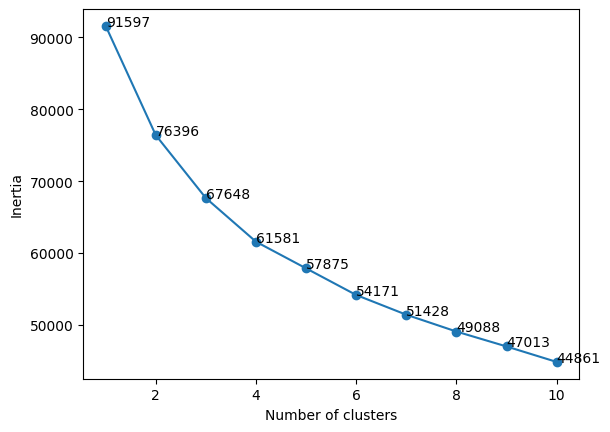

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 正規化
scaler = MinMaxScaler()
df_normalized = scaler.fit_transform(df)

inertias = []
for k in range(1, 11):  # 嘗試1到10個群
    kmeans = KMeans(n_clusters=k, random_state=30, n_init=10).fit(df_normalized)
    inertias.append(kmeans.inertia_)

plt.plot(range(1, 11), inertias, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
# 添加 marker 值
for i, inertia in enumerate(inertias):
    plt.text(i + 1, inertia, str(int(inertia)))
plt.show()

## 標準化後

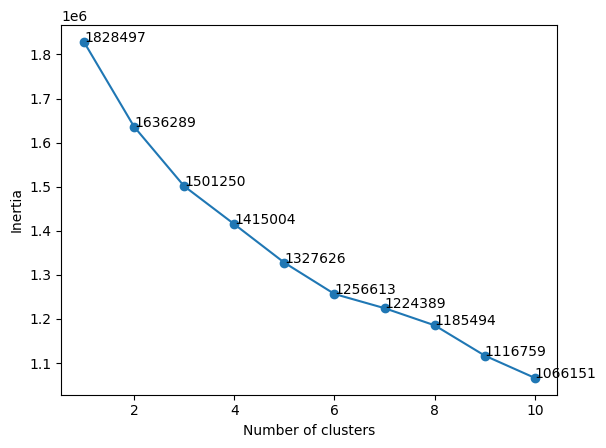

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 標準化
scaler = StandardScaler()
df_standardized = scaler.fit_transform(df)

inertias = []
for k in range(1, 11):  # 嘗試1到10個群
    kmeans = KMeans(n_clusters=k, random_state=30, n_init=10).fit(df_standardized)
    inertias.append(kmeans.inertia_)

plt.plot(range(1, 11), inertias, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
# 添加 marker 值
for i, inertia in enumerate(inertias):
    plt.text(i + 1, inertia, str(int(inertia)))
plt.show()


## 正規化在標準化後

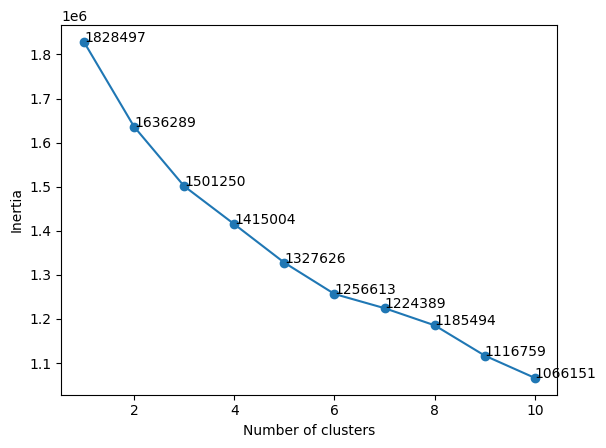

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 正規化
scaler = MinMaxScaler()
df_normalized = scaler.fit_transform(df)

# 標準化
scaler = StandardScaler()
df_standardized = scaler.fit_transform(df_normalized)

inertias = []
for k in range(1, 11):  # 嘗試1到10個群
    kmeans = KMeans(n_clusters=k, random_state=30, n_init=10).fit(df_standardized)
    inertias.append(kmeans.inertia_)

plt.plot(range(1, 11), inertias, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
# 添加 marker 值
for i, inertia in enumerate(inertias):
    plt.text(i + 1, inertia, str(int(inertia)))
plt.show()


# Kmeans 依照x, y 分 2 群

# 固定 0 是高, 1 是低

## 中正區 : 100

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.cluster import KMeans

# 選擇你想要分群的欄位
selected_columns = ['unit_prc']

df_selected = df_100[selected_columns]

# 正規化
scaler = MinMaxScaler()
df_normalized = scaler.fit_transform(df_selected)

# 進行標準化

scaler = StandardScaler()
df_selected_scaled = scaler.fit_transform(df_normalized)

# 使用KMeans進行分群，這裡假設我們要分成3群
kmeans = KMeans(n_clusters=2, random_state=10, n_init=10).fit(df_selected_scaled)

# 將分群結果存回原本的dataframe
df_100['cluster'] = kmeans.labels_

# 你現在可以檢視每一群的特性，例如計算每一群的平均值
df_100.groupby('cluster').mean()


<ipython-input-12-7b332e41358b>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_100['cluster'] = kmeans.labels_


,district,tsign_fg,road_fg,coord_x,coord_y,land,build,berth,land_area,zoning_fg,...,unit_prc,berth_prc,year,month,day,unemployment,cpi,revenue,nearest_tradistance,nearest_metrodistance
cluster,,,,,,,,,,,,,,,,,,,,,
0,100.0,2.577236,0.737398,25.024119,121.507229,1.821951,1.045528,0.586179,5.089732,8.548780,...,104.349431,125.690244,2020.530894,6.802439,15.870732,3.829675,99.868935,966354.352033,0.027213,0.019848
1,100.0,2.716842,0.716316,25.021537,121.501803,1.636316,1.044737,0.367895,5.975316,9.875263,...,64.191895,30.404737,2020.397895,6.521579,16.061053,3.835842,99.567774,969384.340000,0.022593,0.021963


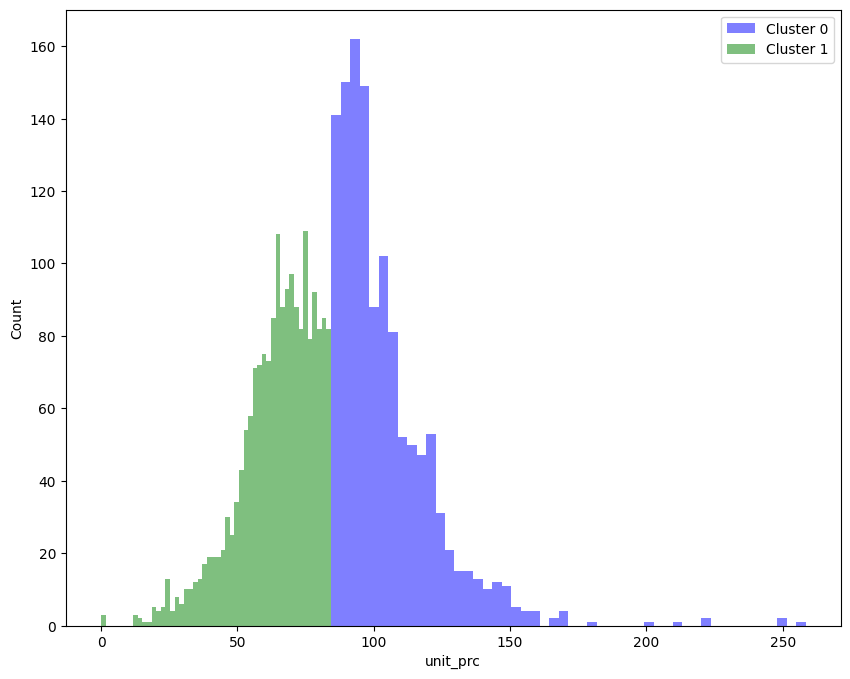

------------------------------


1    1900
0    1230
Name: cluster, dtype: int64

In [ ]:
import matplotlib.pyplot as plt

# 為每個分群指定不同的顏色
colors = ['b', 'g']

plt.figure(figsize=(10, 8))

# 繪製每個分群的直方圖
for i in range(2):
    df_cluster = df_100[df_100['cluster'] == i]
    plt.hist(df_cluster['unit_prc'], color=colors[i], alpha=0.5, bins=50, label=f'Cluster {i}')

plt.xlabel('unit_prc')
plt.ylabel('Count')
plt.legend()
plt.show()
print('------------------------------')
df_100['cluster'].value_counts()

In [ ]:
# 選擇你想要分群的欄位
selected_columns = ['unit_prc']

df_selected = df1_100[selected_columns]

# 正規化
scaler = MinMaxScaler()
df_normalized = scaler.fit_transform(df_selected)

# 進行標準化

scaler = StandardScaler()
df_selected_scaled = scaler.fit_transform(df_normalized)

# 使用KMeans進行分群，這裡假設我們要分成3群
kmeans = KMeans(n_clusters=2, random_state=10, n_init=10).fit(df_selected_scaled)

# 將分群結果存回原本的dataframe
df1_100['cluster'] = kmeans.labels_

# 你現在可以檢視每一群的特性，例如計算每一群的平均值
df1_100.groupby('cluster').mean()

<ipython-input-14-a88972deb5f8>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_100['cluster'] = kmeans.labels_


,district,tsign_fg,road_fg,coord_x,coord_y,land,build,berth,land_area,zoning_fg,...,unit_prc,berth_prc,year,month,day,unemployment,cpi,revenue,nearest_tradistance,nearest_metrodistance
cluster,,,,,,,,,,,,,,,,,,,,,
0,100.0,1.092875,0.729008,25.033523,121.519758,0.104326,0.982188,7.913486,2.234656,6.445293,...,0.099618,0.003053,2020.548346,6.319338,16.248092,3.815903,99.925165,966745.634860,0.01504,0.003862
1,100.0,1.064560,0.791209,25.035003,121.522249,0.067308,0.983516,0.156593,1.154945,5.940934,...,0.218269,0.011126,2020.447802,6.543956,16.365385,3.812363,99.846250,969216.254121,0.01538,0.002888


In [ ]:
df1_100.loc[:, 'cluster'] = df1_100['cluster'].replace({1: 0, 0: 1})

<ipython-input-15-205aa1820c84>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_100.loc[:, 'cluster'] = df1_100['cluster'].replace({1: 0, 0: 1})


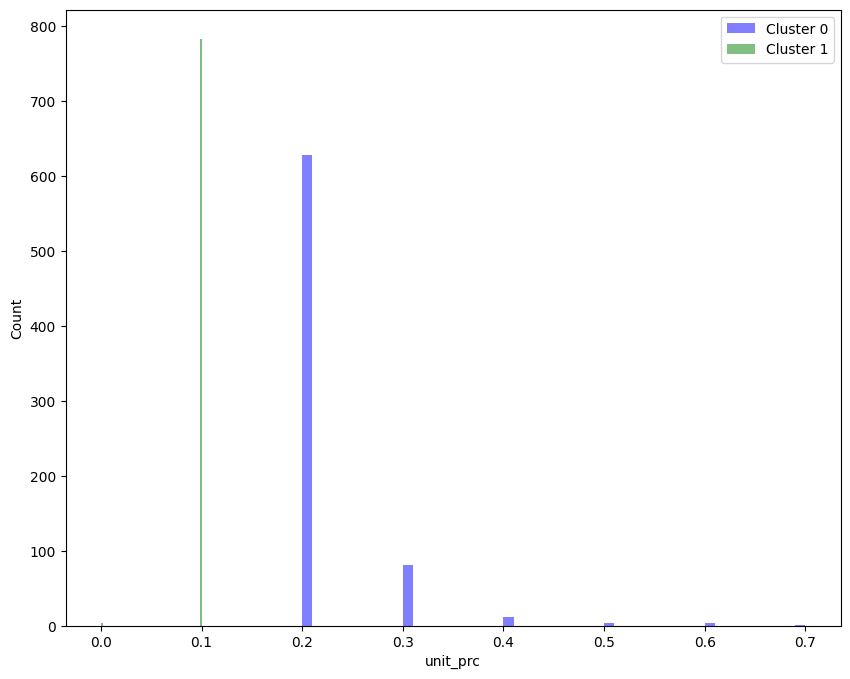

------------------------------


1    786
0    728
Name: cluster, dtype: int64

In [ ]:
# 為每個分群指定不同的顏色
colors = ['b', 'g']

plt.figure(figsize=(10, 8))

# 繪製每個分群的直方圖
for i in range(2):
    df_cluster = df1_100[df1_100['cluster'] == i]
    plt.hist(df_cluster['unit_prc'], color=colors[i], alpha=0.5, bins=50, label=f'Cluster {i}')

plt.xlabel('unit_prc')
plt.ylabel('Count')
plt.legend()
plt.show()
print('------------------------------')
df1_100['cluster'].value_counts()

### 中正區售租比

In [ ]:
data_sell = df_100[['cluster','unit_prc']].groupby(by = 'cluster').mean()
data_sell.rename(columns={'unit_prc':'district_sell'}, inplace = True)
data_sell.reset_index(drop=False,inplace = True)
data_rent = df1_100[['cluster','unit_prc']].groupby(by = 'cluster').mean()
data_rent.rename(columns={'unit_prc':'district_rent'}, inplace = True)
data_rent.reset_index(drop=False,inplace = True)
data = pd.merge(data_rent,data_sell,left_on='cluster', right_on='cluster')

In [ ]:
data

,cluster,district_rent,district_sell
0,0,0.218269,104.349431
1,1,0.099618,64.191895


In [ ]:
data['sell2rentratio'] = data['district_sell']/data['district_rent']
print('房屋租售比中位數為%i個月' % data['sell2rentratio'].median())

房屋租售比中位數為561個月


In [ ]:
data

,cluster,district_rent,district_sell,sell2rentratio
0,0,0.218269,104.349431,478.076688
1,1,0.099618,64.191895,644.378407


In [ ]:
df_100 = df_100.merge(data[['cluster', 'district_rent', 'district_sell', 'sell2rentratio']], on=['cluster'], how='left')
df1_100 = df1_100.merge(data[['cluster', 'district_rent', 'district_sell', 'sell2rentratio']], on=['cluster'], how='left')

In [ ]:
df_100

,district,tsign_fg,road_fg,coord_x,coord_y,land,build,berth,land_area,zoning_fg,...,day,unemployment,cpi,revenue,nearest_tradistance,nearest_metrodistance,cluster,district_rent,district_sell,sell2rentratio
0,100,3,1,25.046222,121.515830,1,1,0,58.40,2.0,...,14,4.0,99.58,936721.0,0.002501,0.001587,0,0.218269,104.349431,478.076688
1,100,2,1,25.033744,121.510901,3,1,7,73.33,1.0,...,3,3.7,101.61,945214.0,0.011064,0.001841,0,0.218269,104.349431,478.076688
2,100,3,1,25.028788,121.521543,4,6,0,38.52,2.0,...,21,3.9,97.94,988329.0,0.019281,0.002755,0,0.218269,104.349431,478.076688
3,100,2,1,25.046793,121.513383,1,3,19,113.91,2.0,...,16,3.9,98.44,988329.0,0.004550,0.004061,1,0.099618,64.191895,644.378407
4,100,2,1,25.041592,121.532457,4,1,3,45.46,2.0,...,11,4.0,100.55,936721.0,0.015846,0.001178,0,0.218269,104.349431,478.076688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3125,100,3,1,25.045821,121.514517,1,1,0,0.27,2.0,...,2,3.7,103.77,945214.0,0.003822,0.002939,1,0.099618,64.191895,644.378407
3126,100,3,1,25.046063,121.514540,1,1,0,0.27,99.0,...,18,3.9,98.10,988329.0,0.003688,0.002886,1,0.099618,64.191895,644.378407
3127,100,3,1,25.037000,121.524951,2,1,0,0.10,2.0,...,9,3.7,103.62,945214.0,0.012855,0.004920,1,0.099618,64.191895,644.378407
3128,100,3,1,25.042224,121.513373,1,1,0,0.06,2.0,...,3,3.7,98.41,999317.0,0.007075,0.002773,1,0.099618,64.191895,644.378407


## 大同區 : 103

In [ ]:
# 選擇你想要分群的欄位
selected_columns = ['unit_prc']

df_selected = df_103[selected_columns]

# 正規化
scaler = MinMaxScaler()
df_normalized = scaler.fit_transform(df_selected)

# 進行標準化

scaler = StandardScaler()
df_selected_scaled = scaler.fit_transform(df_normalized)

# 使用KMeans進行分群，這裡假設我們要分成3群
kmeans = KMeans(n_clusters=2, random_state=10, n_init=15).fit(df_selected_scaled)

# 將分群結果存回原本的dataframe
df_103['cluster'] = kmeans.labels_

# 你現在可以檢視每一群的特性，例如計算每一群的平均值
df_103.groupby('cluster').mean()

<ipython-input-23-58d38863ce57>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_103['cluster'] = kmeans.labels_


,district,tsign_fg,road_fg,coord_x,coord_y,land,build,berth,land_area,zoning_fg,...,unit_prc,berth_prc,year,month,day,unemployment,cpi,revenue,nearest_tradistance,nearest_metrodistance
cluster,,,,,,,,,,,,,,,,,,,,,
0,103.0,2.781373,0.63457,25.061465,121.513438,1.757695,1.037885,0.284925,5.575825,16.488556,...,47.842226,14.681926,2020.317285,6.49487,16.387530,3.826440,99.470852,758844.675612,0.01481,0.004855
1,103.0,2.514428,0.78010,25.060796,121.515699,1.490547,1.019900,0.573134,4.196348,14.783085,...,76.640597,85.669652,2020.402985,6.58209,16.651741,3.819005,99.635552,759399.590050,0.01341,0.003271


In [ ]:
df_103.loc[:, 'cluster'] = df_103['cluster'].replace({1: 0, 0: 1})

<ipython-input-67-1eb439f8ac89>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_103.loc[:, 'cluster'] = df_103['cluster'].replace({1: 0, 0: 1})


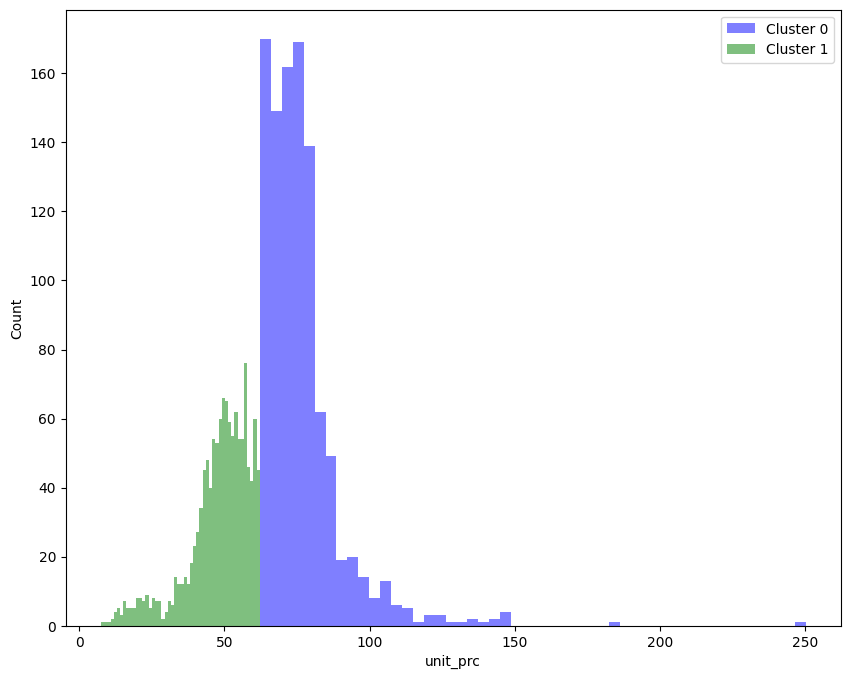

------------------------------


1    1267
0    1005
Name: cluster, dtype: int64

In [ ]:
# 為每個分群指定不同的顏色
colors = ['b', 'g']

plt.figure(figsize=(10, 8))

# 繪製每個分群的直方圖
for i in range(2):
    df_cluster = df_103[df_103['cluster'] == i]
    plt.hist(df_cluster['unit_prc'], color=colors[i], alpha=0.5, bins=50, label=f'Cluster {i}')

plt.xlabel('unit_prc')
plt.ylabel('Count')
plt.legend()
plt.show()
print('------------------------------')
df_103['cluster'].value_counts()

In [ ]:
# 選擇你想要分群的欄位
selected_columns = ['unit_prc']

df_selected = df1_103[selected_columns]

# 正規化
scaler = MinMaxScaler()
df_normalized = scaler.fit_transform(df_selected)

# 進行標準化

scaler = StandardScaler()
df_selected_scaled = scaler.fit_transform(df_normalized)

# 使用KMeans進行分群，這裡假設我們要分成3群
kmeans = KMeans(n_clusters=2, random_state=10, n_init=15).fit(df_selected_scaled)

# 將分群結果存回原本的dataframe
df1_103['cluster'] = kmeans.labels_

# 你現在可以檢視每一群的特性，例如計算每一群的平均值
df1_103.groupby('cluster').mean()

<ipython-input-25-de5d0f873ff6>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_103['cluster'] = kmeans.labels_


,district,tsign_fg,road_fg,coord_x,coord_y,land,build,berth,land_area,zoning_fg,...,unit_prc,berth_prc,year,month,day,unemployment,cpi,revenue,nearest_tradistance,nearest_metrodistance
cluster,,,,,,,,,,,,,,,,,,,,,
0,103.0,1.098204,0.761677,25.059319,121.514962,0.074251,0.940120,0.148503,0.411485,14.428743,...,0.099760,0.002275,2020.578443,6.722156,16.834731,3.814491,100.047018,761992.492216,0.012241,0.003754
1,103.0,1.031546,0.912723,25.053617,121.517760,0.045216,0.970557,0.037855,0.154953,44.677182,...,0.209043,0.001052,2020.644585,6.256572,15.629863,3.813354,100.087886,763155.431125,0.005839,0.002659


In [ ]:
df1_103.loc[:, 'cluster'] = df1_103['cluster'].replace({1: 0, 0: 1})

<ipython-input-69-b61f9cfdee85>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_103.loc[:, 'cluster'] = df1_103['cluster'].replace({1: 0, 0: 1})


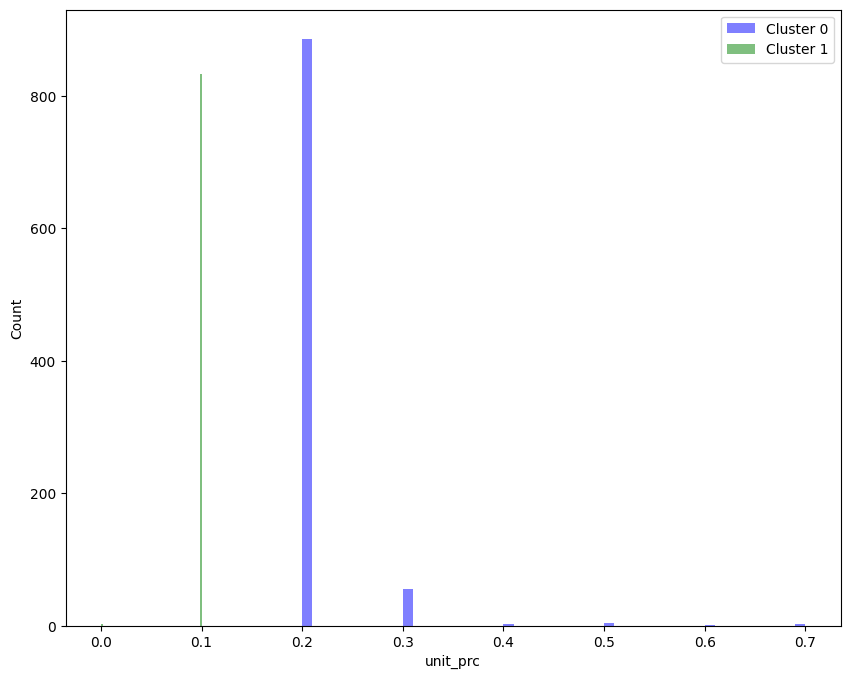

------------------------------


0    951
1    835
Name: cluster, dtype: int64

In [ ]:
# 為每個分群指定不同的顏色
colors = ['b', 'g']

plt.figure(figsize=(10, 8))

# 繪製每個分群的直方圖
for i in range(2):
    df_cluster = df1_103[df1_103['cluster'] == i]
    plt.hist(df_cluster['unit_prc'], color=colors[i], alpha=0.5, bins=50, label=f'Cluster {i}')

plt.xlabel('unit_prc')
plt.ylabel('Count')
plt.legend()
plt.show()
print('------------------------------')
df1_103['cluster'].value_counts()

### 大同區售租比

In [ ]:
data_sell = df_103[['cluster','unit_prc']].groupby(by = 'cluster').mean()
data_sell.rename(columns={'unit_prc':'district_sell'}, inplace = True)
data_sell.reset_index(drop=False,inplace = True)
data_rent = df1_103[['cluster','unit_prc']].groupby(by = 'cluster').mean()
data_rent.rename(columns={'unit_prc':'district_rent'}, inplace = True)
data_rent.reset_index(drop=False,inplace = True)
data = pd.merge(data_rent,data_sell,left_on='cluster', right_on='cluster')
data['sell2rentratio'] = data['district_sell']/data['district_rent']

In [ ]:
data

,cluster,district_rent,district_sell,sell2rentratio
0,0,0.209043,76.640597,366.625794
1,1,0.099760,47.842226,479.570930


In [ ]:
df_103 = df_103.merge(data[['cluster', 'district_rent', 'district_sell', 'sell2rentratio']], on=['cluster'], how='left')
df1_103 = df1_103.merge(data[['cluster', 'district_rent', 'district_sell', 'sell2rentratio']], on=['cluster'], how='left')

## 中山區 : 104

In [ ]:
# 選擇你想要分群的欄位
selected_columns = ['unit_prc']

df_selected = df_104[selected_columns]

# 正規化
scaler = MinMaxScaler()
df_normalized = scaler.fit_transform(df_selected)

# 進行標準化

scaler = StandardScaler()
df_selected_scaled = scaler.fit_transform(df_normalized)

# 使用KMeans進行分群，這裡假設我們要分成3群
kmeans = KMeans(n_clusters=2, random_state=10, n_init=10).fit(df_selected_scaled)

# 將分群結果存回原本的dataframe
df_104['cluster'] = kmeans.labels_

# 你現在可以檢視每一群的特性，例如計算每一群的平均值
df_104.groupby('cluster').mean()

<ipython-input-27-9f8a9cfb4f4f>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_104['cluster'] = kmeans.labels_


,district,tsign_fg,road_fg,coord_x,coord_y,land,build,berth,land_area,zoning_fg,...,unit_prc,berth_prc,year,month,day,unemployment,cpi,revenue,nearest_tradistance,nearest_metrodistance
cluster,,,,,,,,,,,,,,,,,,,,,
0,104.0,2.819379,0.544396,25.059455,121.531167,1.325287,1.054018,0.265192,5.187049,9.465733,...,58.936327,11.610736,2020.485652,6.583390,16.165935,3.830908,99.762330,872999.265868,0.018888,0.004836
1,104.0,2.524286,0.562106,25.060611,121.535068,1.393400,1.059696,0.695217,6.405729,10.880979,...,95.810753,140.934001,2020.684835,6.659622,16.076381,3.830923,100.134935,873716.296626,0.021241,0.003985


In [ ]:
df_104.loc[:, 'cluster'] = df_104['cluster'].replace({1: 0, 0: 1})

<ipython-input-73-81681e6d90b2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_104.loc[:, 'cluster'] = df_104['cluster'].replace({1: 0, 0: 1})


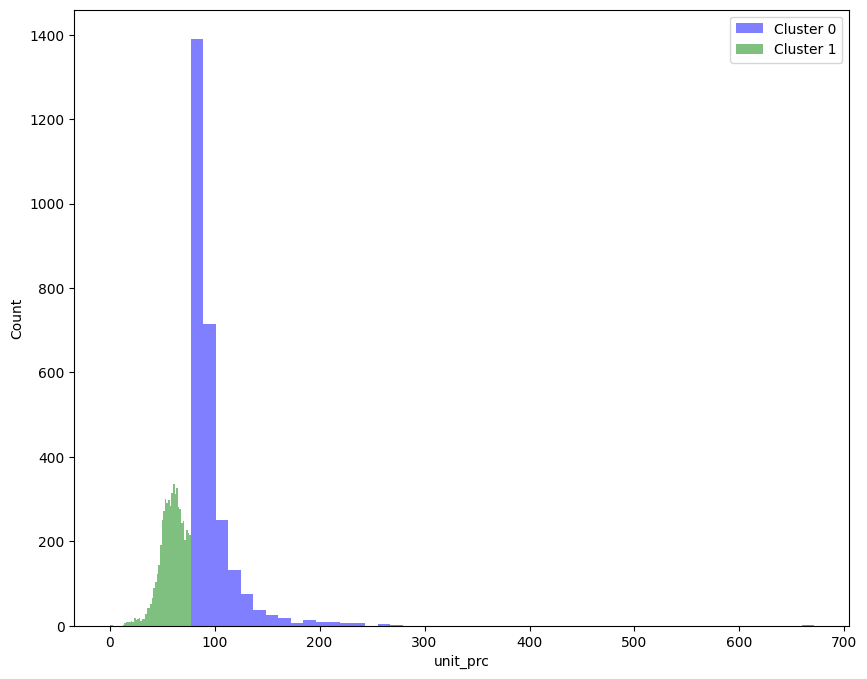

------------------------------


1    5924
0    2697
Name: cluster, dtype: int64

In [ ]:
# 為每個分群指定不同的顏色
colors = ['b', 'g']

plt.figure(figsize=(10, 8))

# 繪製每個分群的直方圖
for i in range(2):
    df_cluster = df_104[df_104['cluster'] == i]
    plt.hist(df_cluster['unit_prc'], color=colors[i], alpha=0.5, bins=50, label=f'Cluster {i}')

plt.xlabel('unit_prc')
plt.ylabel('Count')
plt.legend()
plt.show()
print('------------------------------')
df_104['cluster'].value_counts()

In [ ]:
# 選擇你想要分群的欄位
selected_columns = ['unit_prc']

df_selected = df1_104[selected_columns]

# 正規化
scaler = MinMaxScaler()
df_normalized = scaler.fit_transform(df_selected)

# 進行標準化

scaler = StandardScaler()
df_selected_scaled = scaler.fit_transform(df_normalized)

# 使用KMeans進行分群，這裡假設我們要分成3群
kmeans = KMeans(n_clusters=2, random_state=10, n_init=10).fit(df_selected_scaled)

# 將分群結果存回原本的dataframe
df1_104['cluster'] = kmeans.labels_

# 你現在可以檢視每一群的特性，例如計算每一群的平均值
df1_104.groupby('cluster').mean()

<ipython-input-29-88c3089175cd>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_104['cluster'] = kmeans.labels_


,district,tsign_fg,road_fg,coord_x,coord_y,land,build,berth,land_area,zoning_fg,...,unit_prc,berth_prc,year,month,day,unemployment,cpi,revenue,nearest_tradistance,nearest_metrodistance
cluster,,,,,,,,,,,,,,,,,,,,,
0,104.0,1.062971,0.633115,25.059687,121.530835,0.050571,0.923900,0.101629,1.499125,6.103574,...,0.212181,0.010163,2020.568442,6.265986,15.946268,3.818211,99.912905,871446.615123,0.017699,0.003793
1,104.0,1.087029,0.630877,25.060502,121.533349,0.067022,0.958986,0.173058,32.463074,4.875959,...,0.099767,0.004201,2020.477826,6.508169,16.267756,3.821374,99.782968,871699.549183,0.019814,0.004057


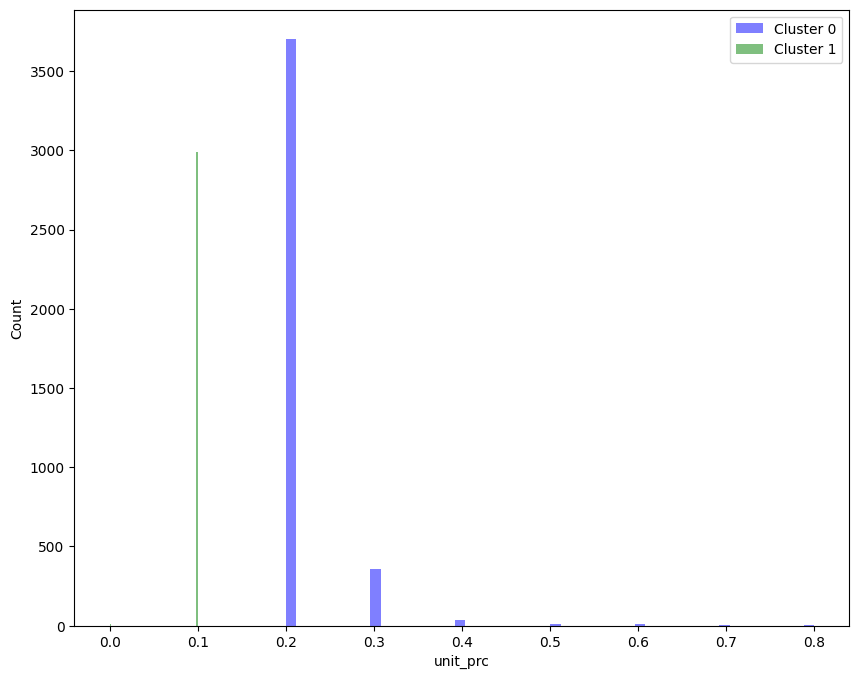

------------------------------


0    4113
1    2999
Name: cluster, dtype: int64

In [ ]:
# 為每個分群指定不同的顏色
colors = ['b', 'g']

plt.figure(figsize=(10, 8))

# 繪製每個分群的直方圖
for i in range(2):
    df_cluster = df1_104[df1_104['cluster'] == i]
    plt.hist(df_cluster['unit_prc'], color=colors[i], alpha=0.5, bins=50, label=f'Cluster {i}')

plt.xlabel('unit_prc')
plt.ylabel('Count')
plt.legend()
plt.show()
print('------------------------------')
df1_104['cluster'].value_counts()

### 中山區售租比

In [ ]:
data_sell = df_104[['cluster','unit_prc']].groupby(by = 'cluster').mean()
data_sell.rename(columns={'unit_prc':'district_sell'}, inplace = True)
data_sell.reset_index(drop=False,inplace = True)
data_rent = df1_104[['cluster','unit_prc']].groupby(by = 'cluster').mean()
data_rent.rename(columns={'unit_prc':'district_rent'}, inplace = True)
data_rent.reset_index(drop=False,inplace = True)
data = pd.merge(data_rent,data_sell,left_on='cluster', right_on='cluster')
data['sell2rentratio'] = data['district_sell']/data['district_rent']

In [ ]:
data

,cluster,district_rent,district_sell,sell2rentratio
0,0,0.212181,95.810753,451.552224
1,1,0.099767,58.936327,590.742126


In [ ]:
df_104 = df_104.merge(data[['cluster', 'district_rent', 'district_sell', 'sell2rentratio']], on=['cluster'], how='left')
df1_104 = df1_104.merge(data[['cluster', 'district_rent', 'district_sell', 'sell2rentratio']], on=['cluster'], how='left')

## 松山區:105

In [ ]:
# 選擇你想要分群的欄位
selected_columns = ['unit_prc']

df_selected = df_105[selected_columns]

# 正規化
scaler = MinMaxScaler()
df_normalized = scaler.fit_transform(df_selected)

# 進行標準化

scaler = StandardScaler()
df_selected_scaled = scaler.fit_transform(df_normalized)

# 使用KMeans進行分群，這裡假設我們要分成3群
kmeans = KMeans(n_clusters=2, random_state=10, n_init=10).fit(df_selected_scaled)

# 將分群結果存回原本的dataframe
df_105['cluster'] = kmeans.labels_

# 你現在可以檢視每一群的特性，例如計算每一群的平均值
df_105.groupby('cluster').mean()

<ipython-input-31-328957044f7a>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_105['cluster'] = kmeans.labels_


,district,tsign_fg,road_fg,coord_x,coord_y,land,build,berth,land_area,zoning_fg,...,unit_prc,berth_prc,year,month,day,unemployment,cpi,revenue,nearest_tradistance,nearest_metrodistance
cluster,,,,,,,,,,,,,,,,,,,,,
0,105.0,2.822567,0.516808,25.050709,121.555958,1.351652,1.048524,0.219819,6.973169,13.793628,...,70.252207,20.611809,2020.465361,6.584917,16.189126,3.825753,99.741508,945421.869044,0.019519,0.009126
1,105.0,2.546926,0.799353,25.050767,121.553113,1.637540,1.038835,0.893204,7.677735,11.967638,...,139.779612,283.462783,2020.983819,6.893204,16.349515,3.836893,100.616246,945562.029126,0.023899,0.004297


In [ ]:
df_105.loc[:, 'cluster'] = df_105['cluster'].replace({1: 0, 0: 1})

<ipython-input-84-ac7871075a6a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_105.loc[:, 'cluster'] = df_105['cluster'].replace({1: 0, 0: 1})


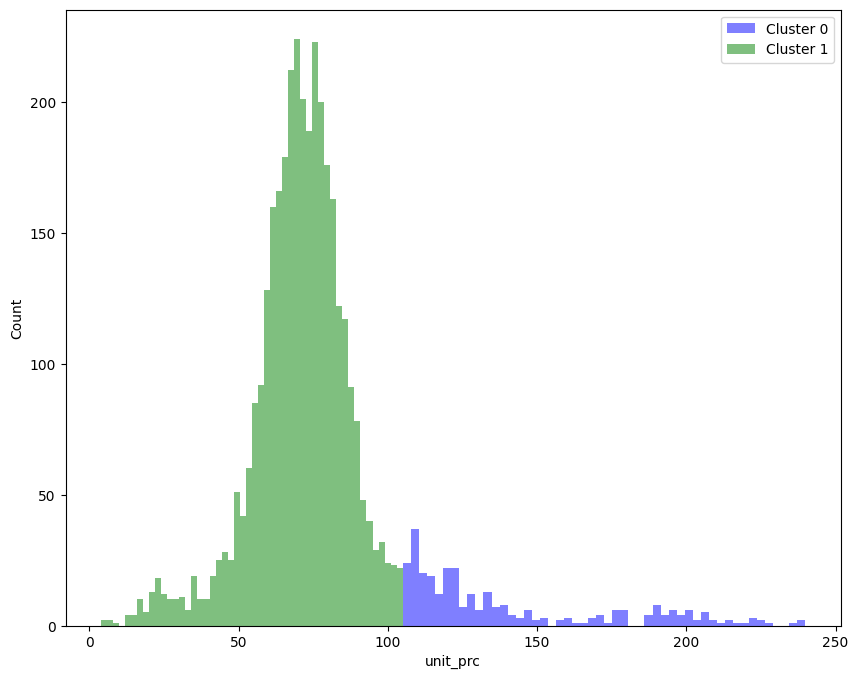

------------------------------


1    3421
0     309
Name: cluster, dtype: int64

In [ ]:
# 為每個分群指定不同的顏色
colors = ['b', 'g']

plt.figure(figsize=(10, 8))

# 繪製每個分群的直方圖
for i in range(2):
    df_cluster = df_105[df_105['cluster'] == i]
    plt.hist(df_cluster['unit_prc'], color=colors[i], alpha=0.5, bins=50, label=f'Cluster {i}')

plt.xlabel('unit_prc')
plt.ylabel('Count')
plt.legend()
plt.show()
print('------------------------------')
df_105['cluster'].value_counts()

In [ ]:
# 選擇你想要分群的欄位
selected_columns = ['unit_prc']

df_selected = df1_105[selected_columns]

# 正規化
scaler = MinMaxScaler()
df_normalized = scaler.fit_transform(df_selected)

# 進行標準化

scaler = StandardScaler()
df_selected_scaled = scaler.fit_transform(df_normalized)

# 使用KMeans進行分群，這裡假設我們要分成3群
kmeans = KMeans(n_clusters=2, random_state=10, n_init=10).fit(df_selected_scaled)

# 將分群結果存回原本的dataframe
df1_105['cluster'] = kmeans.labels_

# 你現在可以檢視每一群的特性，例如計算每一群的平均值
df1_105.groupby('cluster').mean()

<ipython-input-33-8f1fd1b70d1c>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_105['cluster'] = kmeans.labels_


,district,tsign_fg,road_fg,coord_x,coord_y,land,build,berth,land_area,zoning_fg,...,unit_prc,berth_prc,year,month,day,unemployment,cpi,revenue,nearest_tradistance,nearest_metrodistance
cluster,,,,,,,,,,,,,,,,,,,,,
0,105.0,1.250749,0.575425,25.053676,121.557075,0.158841,0.968032,0.130869,2.825425,8.365634,...,0.099800,0.002697,2020.518482,6.654346,16.240759,3.817383,99.903816,945132.434565,0.020999,0.004224
1,105.0,1.169214,0.789301,25.052628,121.554528,0.105895,0.874454,5.601528,2.343406,23.219432,...,0.217249,0.004694,2020.647380,6.984716,17.286026,3.805131,100.273755,950482.505459,0.022903,0.004018


In [ ]:
df1_105.loc[:, 'cluster'] = df1_105['cluster'].replace({1: 0, 0: 1})

<ipython-input-82-334c3943ae5c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_105.loc[:, 'cluster'] = df1_105['cluster'].replace({1: 0, 0: 1})


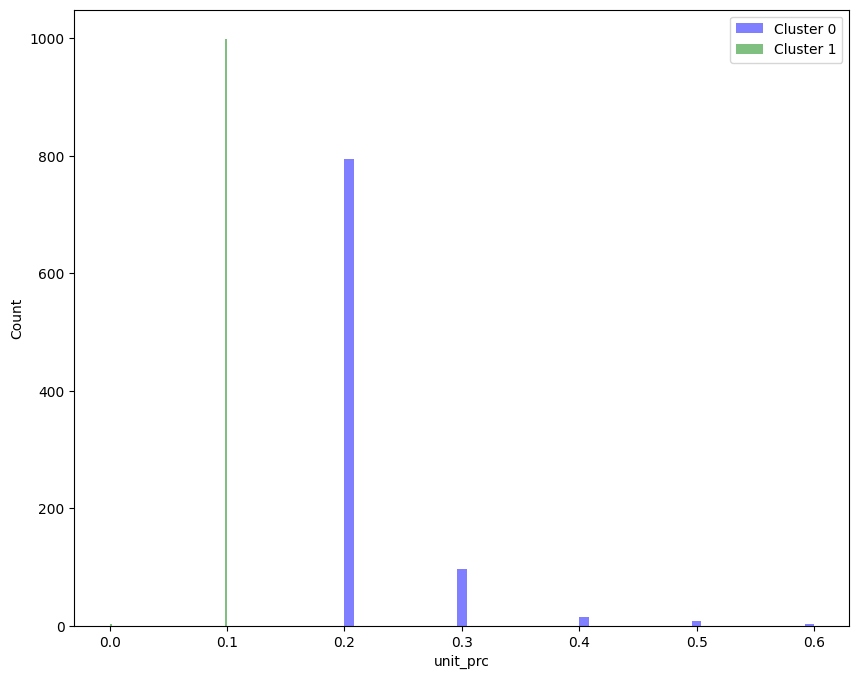

------------------------------


1    1001
0     916
Name: cluster, dtype: int64

In [ ]:
# 為每個分群指定不同的顏色
colors = ['b', 'g']

plt.figure(figsize=(10, 8))

# 繪製每個分群的直方圖
for i in range(2):
    df_cluster = df1_105[df1_105['cluster'] == i]
    plt.hist(df_cluster['unit_prc'], color=colors[i], alpha=0.5, bins=50, label=f'Cluster {i}')

plt.xlabel('unit_prc')
plt.ylabel('Count')
plt.legend()
plt.show()
print('------------------------------')
df1_105['cluster'].value_counts()

### 松山區售租比

In [ ]:
data_sell = df_105[['cluster','unit_prc']].groupby(by = 'cluster').mean()
data_sell.rename(columns={'unit_prc':'district_sell'}, inplace = True)
data_sell.reset_index(drop=False,inplace = True)
data_rent = df1_105[['cluster','unit_prc']].groupby(by = 'cluster').mean()
data_rent.rename(columns={'unit_prc':'district_rent'}, inplace = True)
data_rent.reset_index(drop=False,inplace = True)
data = pd.merge(data_rent,data_sell,left_on='cluster', right_on='cluster')
data['sell2rentratio'] = data['district_sell']/data['district_rent']
data

,cluster,district_rent,district_sell,sell2rentratio
0,0,0.217249,139.779612,643.40766
1,1,0.099800,70.252207,703.92852


In [ ]:
df_105 = df_105.merge(data[['cluster', 'district_rent', 'district_sell', 'sell2rentratio']], on=['cluster'], how='left')
df1_105 = df1_105.merge(data[['cluster', 'district_rent', 'district_sell', 'sell2rentratio']], on=['cluster'], how='left')

## 大安區 : 106

In [ ]:
# 選擇你想要分群的欄位
selected_columns = ['unit_prc']

df_selected = df_106[selected_columns]

# 正規化
scaler = MinMaxScaler()
df_normalized = scaler.fit_transform(df_selected)

# 進行標準化

scaler = StandardScaler()
df_selected_scaled = scaler.fit_transform(df_normalized)

# 使用KMeans進行分群，這裡假設我們要分成3群
kmeans = KMeans(n_clusters=2, random_state=10, n_init=10).fit(df_selected_scaled)

# 將分群結果存回原本的dataframe
df_106['cluster'] = kmeans.labels_

# 你現在可以檢視每一群的特性，例如計算每一群的平均值
df_106.groupby('cluster').mean()

<ipython-input-35-a0a90a4f7dda>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_106['cluster'] = kmeans.labels_


,district,tsign_fg,road_fg,coord_x,coord_y,land,build,berth,land_area,zoning_fg,...,unit_prc,berth_prc,year,month,day,unemployment,cpi,revenue,nearest_tradistance,nearest_metrodistance
cluster,,,,,,,,,,,,,,,,,,,,,
0,106.0,2.804263,0.457220,25.029261,121.543070,1.645152,1.079856,0.275893,6.802891,11.544881,...,79.050645,19.253077,2020.500450,6.768838,15.914440,3.835605,99.769213,1.063993e+06,0.029114,0.005389
1,106.0,2.609890,0.589482,25.030856,121.538886,1.642857,1.054160,0.627943,5.832983,8.695447,...,124.096232,142.144427,2020.864992,6.850078,16.308477,3.825432,100.523823,1.052018e+06,0.026582,0.005189


In [ ]:
df_106.loc[:, 'cluster'] = df_106['cluster'].replace({1: 0, 0: 1})

<ipython-input-88-c3789f38c334>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_106.loc[:, 'cluster'] = df_106['cluster'].replace({1: 0, 0: 1})


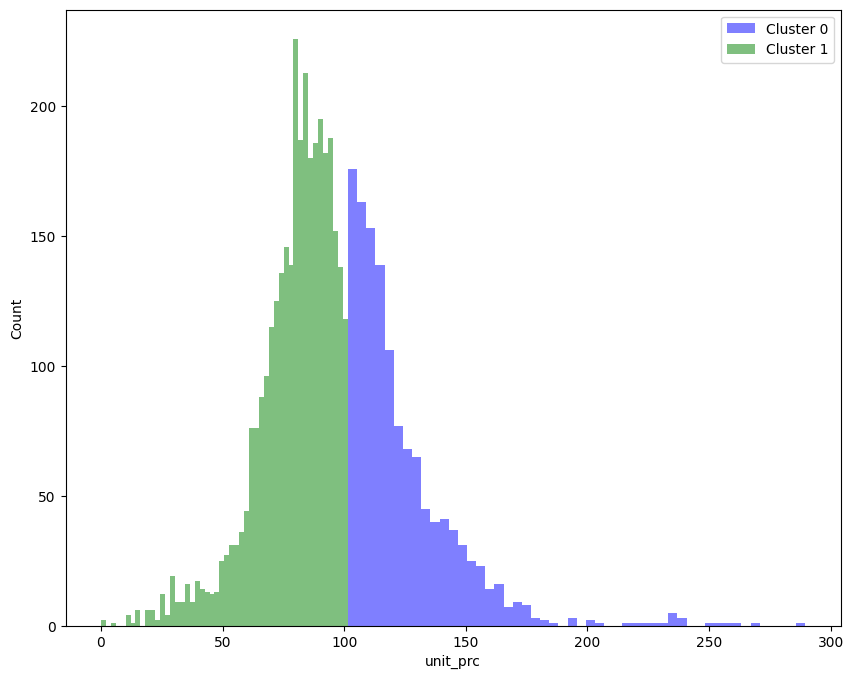

------------------------------


1    3331
0    1274
Name: cluster, dtype: int64

In [ ]:
# 為每個分群指定不同的顏色
colors = ['b', 'g']

plt.figure(figsize=(10, 8))

# 繪製每個分群的直方圖
for i in range(2):
    df_cluster = df_106[df_106['cluster'] == i]
    plt.hist(df_cluster['unit_prc'], color=colors[i], alpha=0.5, bins=50, label=f'Cluster {i}')

plt.xlabel('unit_prc')
plt.ylabel('Count')
plt.legend()
plt.show()

print('------------------------------')
df_106['cluster'].value_counts()

In [ ]:
# 選擇你想要分群的欄位
selected_columns = ['unit_prc']

df_selected = df1_106[selected_columns]

# 正規化
scaler = MinMaxScaler()
df_normalized = scaler.fit_transform(df_selected)

# 進行標準化

scaler = StandardScaler()
df_selected_scaled = scaler.fit_transform(df_normalized)

# 使用KMeans進行分群，這裡假設我們要分成3群
kmeans = KMeans(n_clusters=2, random_state=10, n_init=10).fit(df_selected_scaled)

# 將分群結果存回原本的dataframe
df1_106['cluster'] = kmeans.labels_

# 你現在可以檢視每一群的特性，例如計算每一群的平均值
df1_106.groupby('cluster').mean()

<ipython-input-37-98f67bbb87ab>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_106['cluster'] = kmeans.labels_


,district,tsign_fg,road_fg,coord_x,coord_y,land,build,berth,land_area,zoning_fg,...,unit_prc,berth_prc,year,month,day,unemployment,cpi,revenue,nearest_tradistance,nearest_metrodistance
cluster,,,,,,,,,,,,,,,,,,,,,
0,106.0,1.173359,0.529873,25.031717,121.544520,0.116552,1.002938,0.095005,17.262409,12.749265,...,0.099902,0.009305,2020.423115,6.696376,16.288932,3.810774,99.810196,1.068517e+06,0.028711,0.003277
1,106.0,1.118097,0.581138,25.033769,121.544337,0.084112,1.036534,0.118097,4.462804,13.297366,...,0.229907,0.003144,2020.546304,6.655905,16.710280,3.804758,100.044673,1.064656e+06,0.027712,0.003264


In [ ]:
df1_106.loc[:, 'cluster'] = df1_106['cluster'].replace({1: 0, 0: 1})

<ipython-input-90-1b373bc4c82d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_106.loc[:, 'cluster'] = df1_106['cluster'].replace({1: 0, 0: 1})


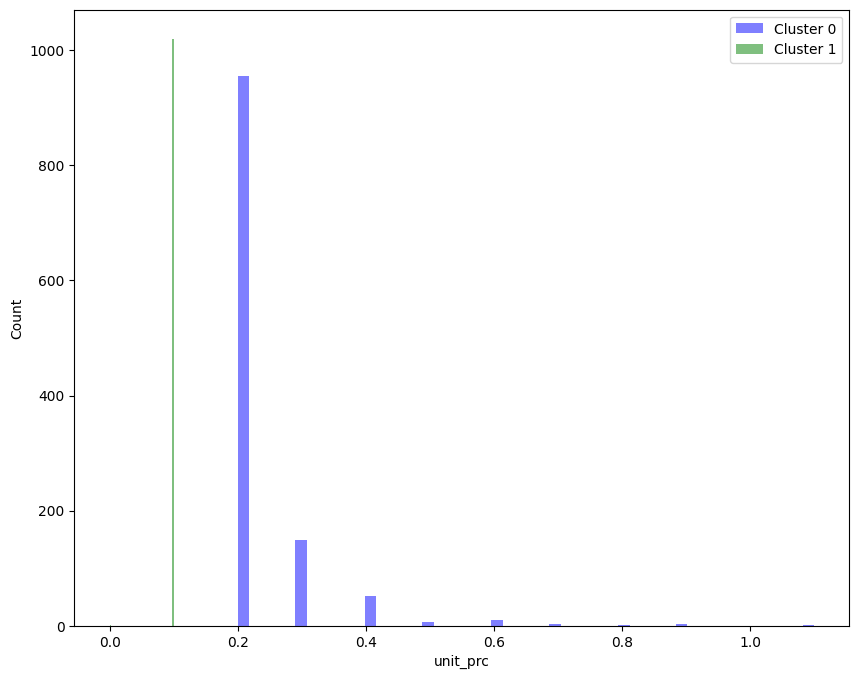

------------------------------


0    1177
1    1021
Name: cluster, dtype: int64

In [ ]:
# 為每個分群指定不同的顏色
colors = ['b', 'g']

plt.figure(figsize=(10, 8))

# 繪製每個分群的直方圖
for i in range(2):
    df_cluster = df1_106[df1_106['cluster'] == i]
    plt.hist(df_cluster['unit_prc'], color=colors[i], alpha=0.5, bins=50, label=f'Cluster {i}')

plt.xlabel('unit_prc')
plt.ylabel('Count')
plt.legend()
plt.show()
print('------------------------------')
df1_106['cluster'].value_counts()

### 大安區售租比

In [ ]:
data_sell = df_106[['cluster','unit_prc']].groupby(by = 'cluster').mean()
data_sell.rename(columns={'unit_prc':'district_sell'}, inplace = True)
data_sell.reset_index(drop=False,inplace = True)
data_rent = df1_106[['cluster','unit_prc']].groupby(by = 'cluster').mean()
data_rent.rename(columns={'unit_prc':'district_rent'}, inplace = True)
data_rent.reset_index(drop=False,inplace = True)
data = pd.merge(data_rent,data_sell,left_on='cluster', right_on='cluster')
data['sell2rentratio'] = data['district_sell']/data['district_rent']
data

,cluster,district_rent,district_sell,sell2rentratio
0,0,0.229907,124.096232,539.768165
1,1,0.099902,79.050645,791.281461


In [ ]:
df_106 = df_106.merge(data[['cluster', 'district_rent', 'district_sell', 'sell2rentratio']], on=['cluster'], how='left')
df1_106 = df1_106.merge(data[['cluster', 'district_rent', 'district_sell', 'sell2rentratio']], on=['cluster'], how='left')

## 萬華區 : 108

In [ ]:
# 選擇你想要分群的欄位
selected_columns = ['unit_prc']

df_selected = df_108[selected_columns]

# 正規化
scaler = MinMaxScaler()
df_normalized = scaler.fit_transform(df_selected)

# 進行標準化

scaler = StandardScaler()
df_selected_scaled = scaler.fit_transform(df_normalized)

# 使用KMeans進行分群，這裡假設我們要分成3群
kmeans = KMeans(n_clusters=2, random_state=10, n_init=10).fit(df_selected_scaled)

# 將分群結果存回原本的dataframe
df_108['cluster'] = kmeans.labels_

# 你現在可以檢視每一群的特性，例如計算每一群的平均值
df_108.groupby('cluster').mean()

<ipython-input-39-3f7e19d54268>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_108['cluster'] = kmeans.labels_


,district,tsign_fg,road_fg,coord_x,coord_y,land,build,berth,land_area,zoning_fg,...,unit_prc,berth_prc,year,month,day,unemployment,cpi,revenue,nearest_tradistance,nearest_metrodistance
cluster,,,,,,,,,,,,,,,,,,,,,
0,108.0,2.599349,0.791531,25.034705,121.499969,1.301846,1.030402,0.462541,4.280375,9.735613,...,63.226493,63.014658,2020.687839,6.830619,15.822476,3.826167,100.154425,735879.509772,0.008350,0.008945
1,108.0,2.846154,0.522373,25.029842,121.496583,1.518351,1.050779,0.175465,6.041498,9.985420,...,39.403871,5.098542,2020.398190,6.739568,16.251383,3.820060,99.701900,727545.500754,0.008932,0.011606


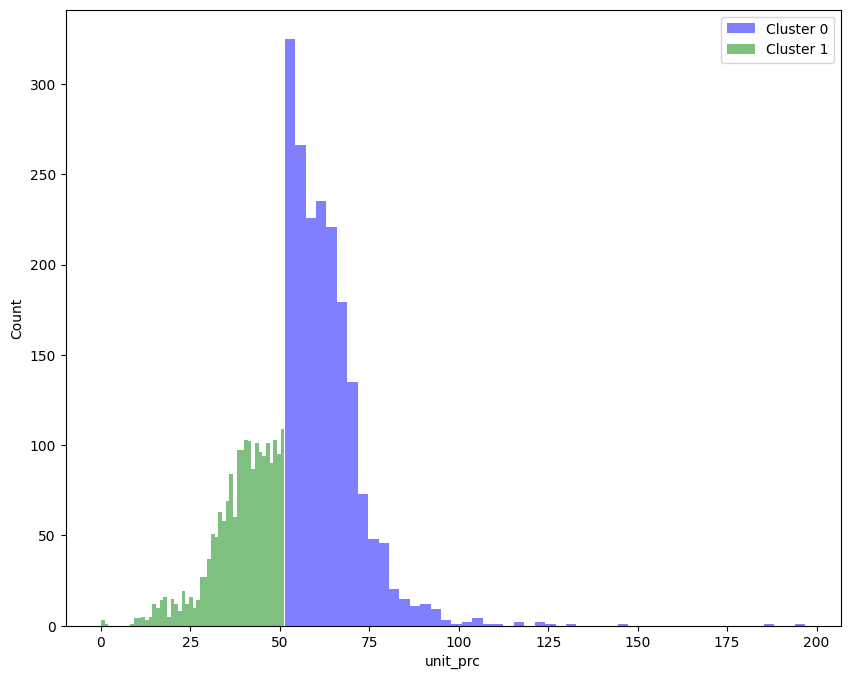

------------------------------


1    1989
0    1842
Name: cluster, dtype: int64

In [ ]:
# 為每個分群指定不同的顏色
colors = ['b', 'g']

plt.figure(figsize=(10, 8))

# 繪製每個分群的直方圖
for i in range(2):
    df_cluster = df_108[df_108['cluster'] == i]
    plt.hist(df_cluster['unit_prc'], color=colors[i], alpha=0.5, bins=50, label=f'Cluster {i}')

plt.xlabel('unit_prc')
plt.ylabel('Count')
plt.legend()
plt.show()
print('------------------------------')
df_108['cluster'].value_counts()

In [ ]:
# 選擇你想要分群的欄位
selected_columns = ['unit_prc']

df_selected = df1_108[selected_columns]

# 正規化
scaler = MinMaxScaler()
df_normalized = scaler.fit_transform(df_selected)

# 進行標準化

scaler = StandardScaler()
df_selected_scaled = scaler.fit_transform(df_normalized)

# 使用KMeans進行分群，這裡假設我們要分成3群
kmeans = KMeans(n_clusters=2, random_state=10, n_init=10).fit(df_selected_scaled)

# 將分群結果存回原本的dataframe
df1_108['cluster'] = kmeans.labels_

# 你現在可以檢視每一群的特性，例如計算每一群的平均值
df1_108.groupby('cluster').mean()

<ipython-input-41-86937207673a>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_108['cluster'] = kmeans.labels_


,district,tsign_fg,road_fg,coord_x,coord_y,land,build,berth,land_area,zoning_fg,...,unit_prc,berth_prc,year,month,day,unemployment,cpi,revenue,nearest_tradistance,nearest_metrodistance
cluster,,,,,,,,,,,,,,,,,,,,,
0,108.0,1.071371,0.680454,25.034554,121.501447,0.046229,0.916464,0.051906,0.747372,7.269262,...,0.117843,0.000892,2020.862125,6.954582,16.596107,3.813706,100.535669,741056.038118,0.008889,0.006873
1,108.0,1.333333,0.916667,25.043714,121.506082,0.250000,1.333333,0.000000,0.345000,2.000000,...,0.725000,0.000000,2019.833333,5.166667,12.250000,3.791667,98.882500,700600.833333,0.011045,0.002820


In [ ]:
df1_108.loc[:, 'cluster'] = df1_108['cluster'].replace({1: 0, 0: 1})

<ipython-input-97-8724544d9d82>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_108.loc[:, 'cluster'] = df1_108['cluster'].replace({1: 0, 0: 1})


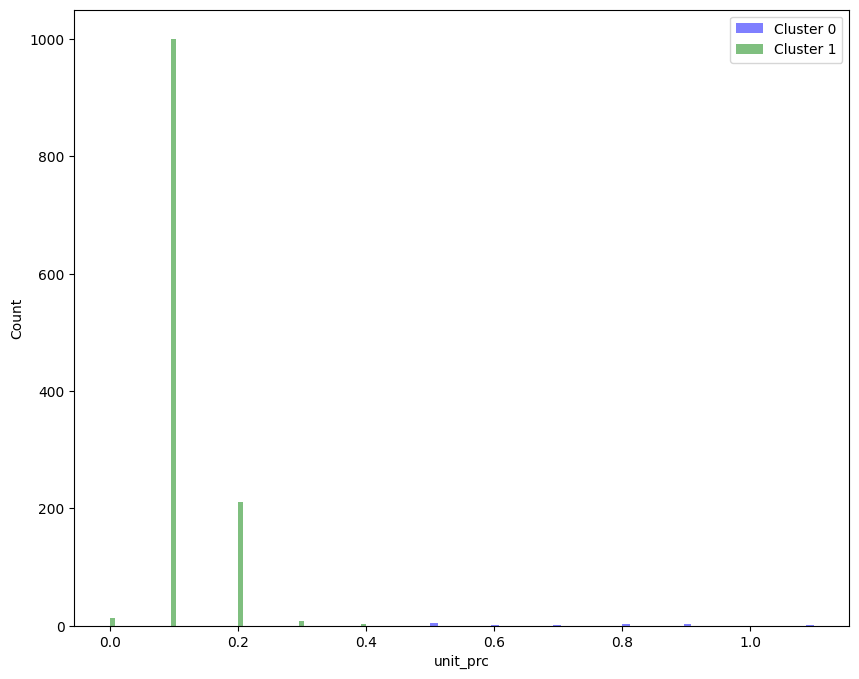

------------------------------


1    1233
0      12
Name: cluster, dtype: int64

In [ ]:
# 為每個分群指定不同的顏色
colors = ['b', 'g']

plt.figure(figsize=(10, 8))

# 繪製每個分群的直方圖
for i in range(2):
    df_cluster = df1_108[df1_108['cluster'] == i]
    plt.hist(df_cluster['unit_prc'], color=colors[i], alpha=0.5, bins=50, label=f'Cluster {i}')

plt.xlabel('unit_prc')
plt.ylabel('Count')
plt.legend()
plt.show()
print('------------------------------')
df1_108['cluster'].value_counts()

### 萬華區售租比

In [ ]:
data_sell = df_108[['cluster','unit_prc']].groupby(by = 'cluster').mean()
data_sell.rename(columns={'unit_prc':'district_sell'}, inplace = True)
data_sell.reset_index(drop=False,inplace = True)
data_rent = df1_108[['cluster','unit_prc']].groupby(by = 'cluster').mean()
data_rent.rename(columns={'unit_prc':'district_rent'}, inplace = True)
data_rent.reset_index(drop=False,inplace = True)
data = pd.merge(data_rent,data_sell,left_on='cluster', right_on='cluster')
data['sell2rentratio'] = data['district_sell']/data['district_rent']
df_108 = df_108.merge(data[['cluster', 'district_rent', 'district_sell', 'sell2rentratio']], on=['cluster'], how='left')
df1_108 = df1_108.merge(data[['cluster', 'district_rent', 'district_sell', 'sell2rentratio']], on=['cluster'], how='left')
data

,cluster,district_rent,district_sell,sell2rentratio
0,0,0.725000,63.226493,87.208956
1,1,0.117843,39.403871,334.376967


## 信義區 : 110

In [ ]:
# 選擇你想要分群的欄位
selected_columns = ['unit_prc']

df_selected = df_110[selected_columns]

# 正規化
scaler = MinMaxScaler()
df_normalized = scaler.fit_transform(df_selected)

# 進行標準化

scaler = StandardScaler()
df_selected_scaled = scaler.fit_transform(df_normalized)

# 使用KMeans進行分群，這裡假設我們要分成3群
kmeans = KMeans(n_clusters=2, random_state=10, n_init=10).fit(df_selected_scaled)

# 將分群結果存回原本的dataframe
df_110['cluster'] = kmeans.labels_

# 你現在可以檢視每一群的特性，例如計算每一群的平均值
df_110.groupby('cluster').mean()

<ipython-input-43-cd1597ccefd7>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_110['cluster'] = kmeans.labels_


,district,tsign_fg,road_fg,coord_x,coord_y,land,build,berth,land_area,zoning_fg,...,unit_prc,berth_prc,year,month,day,unemployment,cpi,revenue,nearest_tradistance,nearest_metrodistance
cluster,,,,,,,,,,,,,,,,,,,,,
0,110.0,2.773535,0.390764,25.033997,121.568953,1.564831,1.036412,0.318828,7.310853,9.802250,...,67.633925,22.667851,2020.614861,6.808467,16.186797,3.832978,100.015435,866592.986382,0.019154,0.004960
1,110.0,2.557196,0.719557,25.038336,121.569537,1.757688,1.049200,0.798278,8.418647,14.329643,...,129.099877,203.327183,2020.730627,6.468635,16.321033,3.823247,100.200873,865178.943419,0.014947,0.002967


In [ ]:
df_110.loc[:, 'cluster'] = df_110['cluster'].replace({1: 0, 0: 1})

<ipython-input-100-8483f8c9d779>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_110.loc[:, 'cluster'] = df_110['cluster'].replace({1: 0, 0: 1})


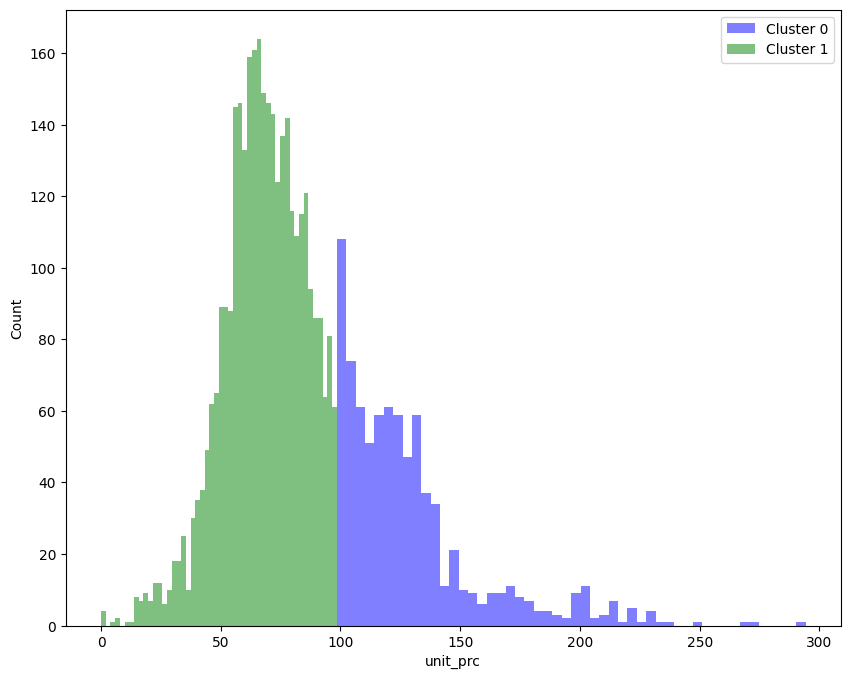

------------------------------


1    3378
0     813
Name: cluster, dtype: int64

In [ ]:
# 為每個分群指定不同的顏色
colors = ['b', 'g']

plt.figure(figsize=(10, 8))

# 繪製每個分群的直方圖
for i in range(2):
    df_cluster = df_110[df_110['cluster'] == i]
    plt.hist(df_cluster['unit_prc'], color=colors[i], alpha=0.5, bins=50, label=f'Cluster {i}')

plt.xlabel('unit_prc')
plt.ylabel('Count')
plt.legend()
plt.show()
print('------------------------------')
df_110['cluster'].value_counts()

In [ ]:
# 選擇你想要分群的欄位
selected_columns = ['unit_prc']

df_selected = df1_110[selected_columns]

# 正規化
scaler = MinMaxScaler()
df_normalized = scaler.fit_transform(df_selected)

# 進行標準化

scaler = StandardScaler()
df_selected_scaled = scaler.fit_transform(df_normalized)

# 使用KMeans進行分群，這裡假設我們要分成3群
kmeans = KMeans(n_clusters=2, random_state=10, n_init=10).fit(df_selected_scaled)

# 將分群結果存回原本的dataframe
df1_110['cluster'] = kmeans.labels_

# 你現在可以檢視每一群的特性，例如計算每一群的平均值
df1_110.groupby('cluster').mean()

<ipython-input-45-4ac0122914e1>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_110['cluster'] = kmeans.labels_


,district,tsign_fg,road_fg,coord_x,coord_y,land,build,berth,land_area,zoning_fg,...,unit_prc,berth_prc,year,month,day,unemployment,cpi,revenue,nearest_tradistance,nearest_metrodistance
cluster,,,,,,,,,,,,,,,,,,,,,
0,110.0,1.168919,0.551520,25.036103,121.568638,0.119088,0.950169,0.137669,1.901537,9.152872,...,0.099071,0.006841,2020.635135,6.657095,15.703547,3.810220,100.152365,869465.517736,0.01755,0.004562
1,110.0,1.175901,0.743184,25.036015,121.566939,0.116974,0.980651,0.206684,10.400756,28.550572,...,0.237555,0.018470,2020.490765,6.718558,16.749340,3.808179,99.948452,868560.492524,0.01825,0.003561


In [ ]:
df1_110.loc[:, 'cluster'] = df1_110['cluster'].replace({1: 0, 0: 1})

<ipython-input-102-10d71cd73c5a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_110.loc[:, 'cluster'] = df1_110['cluster'].replace({1: 0, 0: 1})


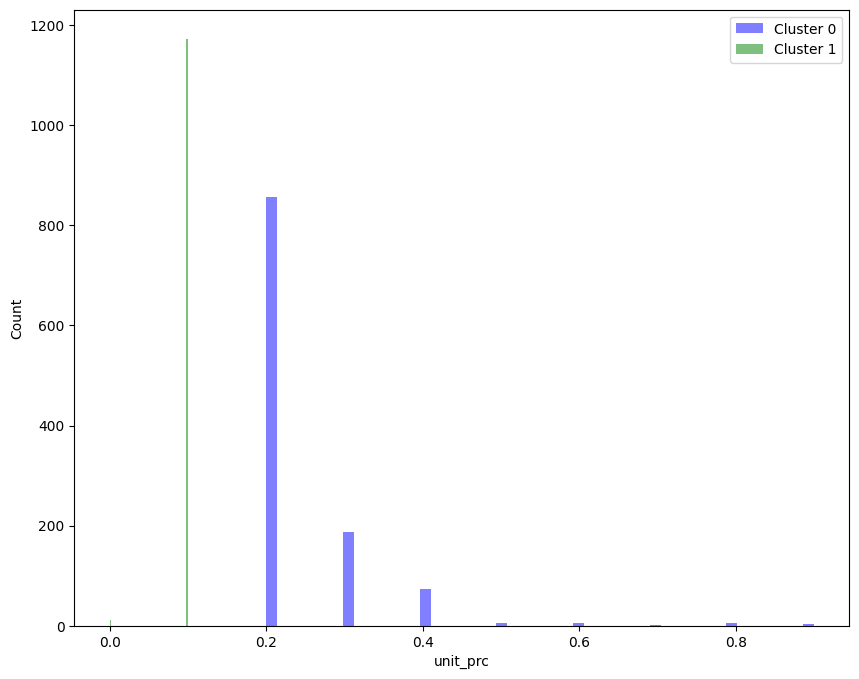

------------------------------


1    1184
0    1137
Name: cluster, dtype: int64

In [ ]:
# 為每個分群指定不同的顏色
colors = ['b', 'g']

plt.figure(figsize=(10, 8))

# 繪製每個分群的直方圖
for i in range(2):
    df_cluster = df1_110[df1_110['cluster'] == i]
    plt.hist(df_cluster['unit_prc'], color=colors[i], alpha=0.5, bins=50, label=f'Cluster {i}')

plt.xlabel('unit_prc')
plt.ylabel('Count')
plt.legend()
plt.show()
print('------------------------------')
df1_110['cluster'].value_counts()

### 信義區售租比

In [ ]:
data_sell = df_110[['cluster','unit_prc']].groupby(by = 'cluster').mean()
data_sell.rename(columns={'unit_prc':'district_sell'}, inplace = True)
data_sell.reset_index(drop=False,inplace = True)
data_rent = df1_110[['cluster','unit_prc']].groupby(by = 'cluster').mean()
data_rent.rename(columns={'unit_prc':'district_rent'}, inplace = True)
data_rent.reset_index(drop=False,inplace = True)
data = pd.merge(data_rent,data_sell,left_on='cluster', right_on='cluster')
data['sell2rentratio'] = data['district_sell']/data['district_rent']
df_110 = df_110.merge(data[['cluster', 'district_rent', 'district_sell', 'sell2rentratio']], on=['cluster'], how='left')
df1_110 = df1_110.merge(data[['cluster', 'district_rent', 'district_sell', 'sell2rentratio']], on=['cluster'], how='left')
data

,cluster,district_rent,district_sell,sell2rentratio
0,0,0.237555,129.099877,543.452648
1,1,0.099071,67.633925,682.681736


## 士林區 : 111

In [ ]:
# 選擇你想要分群的欄位
selected_columns = ['unit_prc']

df_selected = df_111[selected_columns]

# 正規化
scaler = MinMaxScaler()
df_normalized = scaler.fit_transform(df_selected)

# 進行標準化

scaler = StandardScaler()
df_selected_scaled = scaler.fit_transform(df_normalized)

# 使用KMeans進行分群，這裡假設我們要分成3群
kmeans = KMeans(n_clusters=2, random_state=10, n_init=10).fit(df_selected_scaled)

# 將分群結果存回原本的dataframe
df_111['cluster'] = kmeans.labels_

# 你現在可以檢視每一群的特性，例如計算每一群的平均值
df_111.groupby('cluster').mean()

<ipython-input-47-132d29bfd47f>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_111['cluster'] = kmeans.labels_


,district,tsign_fg,road_fg,coord_x,coord_y,land,build,berth,land_area,zoning_fg,...,unit_prc,berth_prc,year,month,day,unemployment,cpi,revenue,nearest_tradistance,nearest_metrodistance
cluster,,,,,,,,,,,,,,,,,,,,,
0,111.0,2.789474,0.392199,25.099399,121.522852,1.422656,1.046220,0.285867,11.206522,8.715202,...,50.061902,21.542880,2020.495325,6.660700,15.850387,3.832567,99.782330,855821.537002,0.054293,0.014716
1,111.0,2.523023,0.516942,25.102061,121.525382,1.428323,1.052997,0.813206,19.368419,13.504778,...,96.361512,173.165943,2020.677672,6.706342,16.259774,3.823371,100.122189,857356.139878,0.057209,0.011100


In [ ]:
df_111.loc[:, 'cluster'] = df_111['cluster'].replace({1: 0, 0: 1})

<ipython-input-105-c9179356a73e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_111.loc[:, 'cluster'] = df_111['cluster'].replace({1: 0, 0: 1})


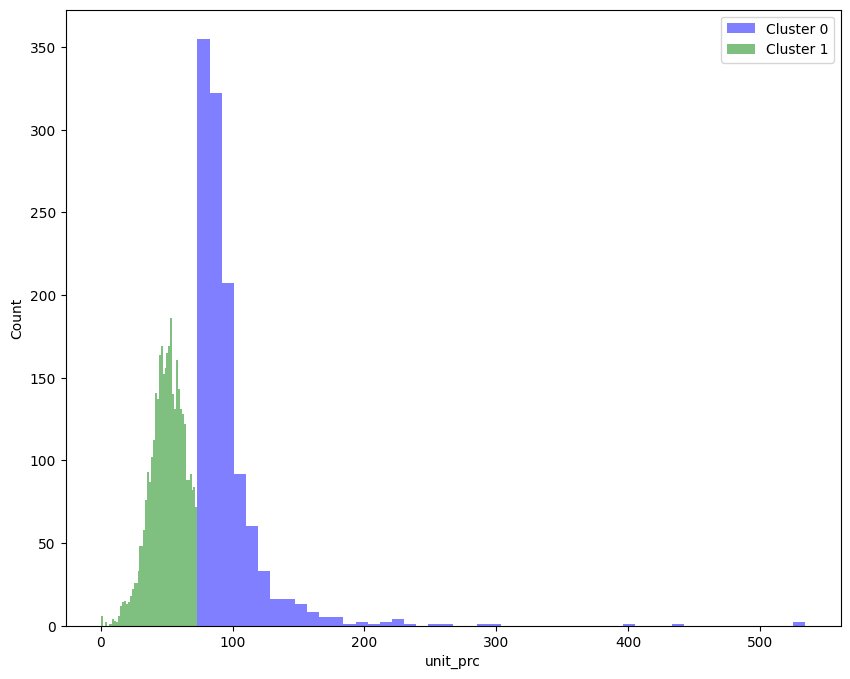

------------------------------


1    3743
0    1151
Name: cluster, dtype: int64

In [ ]:
# 為每個分群指定不同的顏色
colors = ['b', 'g']

plt.figure(figsize=(10, 8))

# 繪製每個分群的直方圖
for i in range(2):
    df_cluster = df_111[df_111['cluster'] == i]
    plt.hist(df_cluster['unit_prc'], color=colors[i], alpha=0.5, bins=50, label=f'Cluster {i}')

plt.xlabel('unit_prc')
plt.ylabel('Count')
plt.legend()
plt.show()
print('------------------------------')
df_111['cluster'].value_counts()

In [ ]:
# 選擇你想要分群的欄位
selected_columns = ['unit_prc']

df_selected = df1_111[selected_columns]

# 正規化
scaler = MinMaxScaler()
df_normalized = scaler.fit_transform(df_selected)

# 進行標準化

scaler = StandardScaler()
df_selected_scaled = scaler.fit_transform(df_normalized)

# 使用KMeans進行分群，這裡假設我們要分成3群
kmeans = KMeans(n_clusters=2, random_state=10, n_init=10).fit(df_selected_scaled)

# 將分群結果存回原本的dataframe
df1_111['cluster'] = kmeans.labels_

# 你現在可以檢視每一群的特性，例如計算每一群的平均值
df1_111.groupby('cluster').mean()

<ipython-input-49-8622cee925c7>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_111['cluster'] = kmeans.labels_


,district,tsign_fg,road_fg,coord_x,coord_y,land,build,berth,land_area,zoning_fg,...,unit_prc,berth_prc,year,month,day,unemployment,cpi,revenue,nearest_tradistance,nearest_metrodistance
cluster,,,,,,,,,,,,,,,,,,,,,
0,111.0,1.082563,0.454713,25.104685,121.526285,0.081331,0.95687,0.229821,4.730394,4.967344,...,0.098521,0.007763,2020.590265,6.620456,16.294516,3.813124,100.048404,853122.785582,0.057613,0.011106
1,111.0,1.071507,0.585259,25.108003,121.528295,0.056106,0.90319,0.136414,2.262684,6.490649,...,0.213311,0.003410,2020.640264,6.294829,16.244224,3.809681,100.083949,852502.198020,0.060910,0.010531


In [ ]:
df1_111.loc[:, 'cluster'] = df1_111['cluster'].replace({1: 0, 0: 1})

<ipython-input-107-f0a07eff9c93>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_111.loc[:, 'cluster'] = df1_111['cluster'].replace({1: 0, 0: 1})


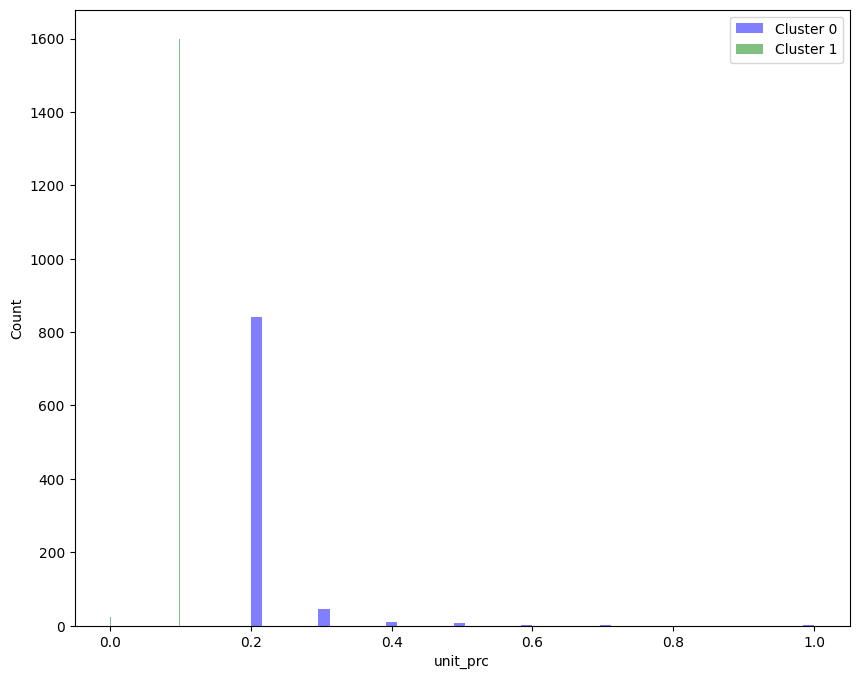

------------------------------


1    1623
0     909
Name: cluster, dtype: int64

In [ ]:
# 為每個分群指定不同的顏色
colors = ['b', 'g']

plt.figure(figsize=(10, 8))

# 繪製每個分群的直方圖
for i in range(2):
    df_cluster = df1_111[df1_111['cluster'] == i]
    plt.hist(df_cluster['unit_prc'], color=colors[i], alpha=0.5, bins=50, label=f'Cluster {i}')

plt.xlabel('unit_prc')
plt.ylabel('Count')
plt.legend()
plt.show()
print('------------------------------')
df1_111['cluster'].value_counts()

### 士林區售租比

In [ ]:
data_sell = df_111[['cluster','unit_prc']].groupby(by = 'cluster').mean()
data_sell.rename(columns={'unit_prc':'district_sell'}, inplace = True)
data_sell.reset_index(drop=False,inplace = True)
data_rent = df1_111[['cluster','unit_prc']].groupby(by = 'cluster').mean()
data_rent.rename(columns={'unit_prc':'district_rent'}, inplace = True)
data_rent.reset_index(drop=False,inplace = True)
data = pd.merge(data_rent,data_sell,left_on='cluster', right_on='cluster')
data['sell2rentratio'] = data['district_sell']/data['district_rent']
df_111 = df_111.merge(data[['cluster', 'district_rent', 'district_sell', 'sell2rentratio']], on=['cluster'], how='left')
df1_111 = df1_111.merge(data[['cluster', 'district_rent', 'district_sell', 'sell2rentratio']], on=['cluster'], how='left')
data

,cluster,district_rent,district_sell,sell2rentratio
0,0,0.213311,96.361512,451.741177
1,1,0.098521,50.061902,508.133004


## 北投區 : 112

In [ ]:
# 選擇你想要分群的欄位
selected_columns = ['unit_prc']

df_selected = df_112[selected_columns]

# 正規化
scaler = MinMaxScaler()
df_normalized = scaler.fit_transform(df_selected)

# 進行標準化

scaler = StandardScaler()
df_selected_scaled = scaler.fit_transform(df_normalized)

# 使用KMeans進行分群，這裡假設我們要分成3群
kmeans = KMeans(n_clusters=2, random_state=10, n_init=10).fit(df_selected_scaled)

# 將分群結果存回原本的dataframe
df_112['cluster'] = kmeans.labels_

# 你現在可以檢視每一群的特性，例如計算每一群的平均值
df_112.groupby('cluster').mean()

<ipython-input-51-cd8025ac830e>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_112['cluster'] = kmeans.labels_


,district,tsign_fg,road_fg,coord_x,coord_y,land,build,berth,land_area,zoning_fg,...,unit_prc,berth_prc,year,month,day,unemployment,cpi,revenue,nearest_tradistance,nearest_metrodistance
cluster,,,,,,,,,,,,,,,,,,,,,
0,112.0,2.715420,0.458333,25.177305,121.081989,1.425170,1.024376,0.350907,10.036772,15.445862,...,39.319104,17.875000,2020.407596,6.532596,16.128118,3.835969,99.594612,783527.223356,0.550786,0.48578
1,112.0,2.500282,0.461365,25.115954,121.508302,1.268472,1.033277,0.658206,11.169729,10.615905,...,69.487366,103.668923,2020.535815,6.778342,15.940214,3.818443,99.919408,784341.795826,0.078618,0.01749


In [ ]:
df_112.loc[:, 'cluster'] = df_112['cluster'].replace({1: 0, 0: 1})

<ipython-input-111-b14c0e16f046>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_112.loc[:, 'cluster'] = df_112['cluster'].replace({1: 0, 0: 1})


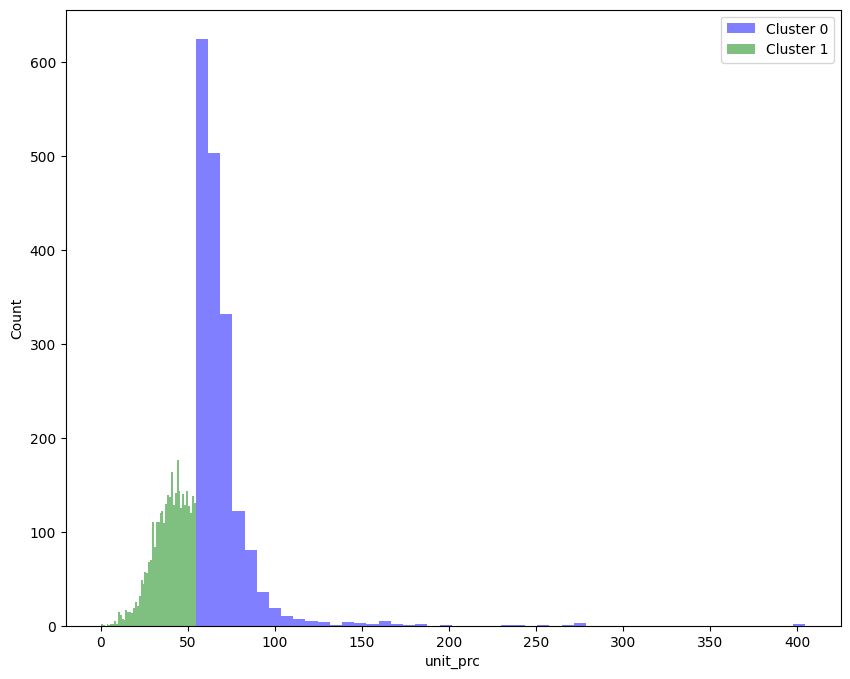

------------------------------


1    3528
0    1773
Name: cluster, dtype: int64

In [ ]:
# 為每個分群指定不同的顏色
colors = ['b', 'g']

plt.figure(figsize=(10, 8))

# 繪製每個分群的直方圖
for i in range(2):
    df_cluster = df_112[df_112['cluster'] == i]
    plt.hist(df_cluster['unit_prc'], color=colors[i], alpha=0.5, bins=50, label=f'Cluster {i}')

plt.xlabel('unit_prc')
plt.ylabel('Count')
plt.legend()
plt.show()
print('------------------------------')
df_112['cluster'].value_counts()

In [ ]:
# 選擇你想要分群的欄位
selected_columns = ['unit_prc']

df_selected = df1_112[selected_columns]

# 正規化
scaler = MinMaxScaler()
df_normalized = scaler.fit_transform(df_selected)

# 進行標準化

scaler = StandardScaler()
df_selected_scaled = scaler.fit_transform(df_normalized)

# 使用KMeans進行分群，這裡假設我們要分成3群
kmeans = KMeans(n_clusters=2, random_state=10, n_init=10).fit(df_selected_scaled)

# 將分群結果存回原本的dataframe
df1_112['cluster'] = kmeans.labels_

# 你現在可以檢視每一群的特性，例如計算每一群的平均值
df1_112.groupby('cluster').mean()

<ipython-input-53-3f8983241dbc>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_112['cluster'] = kmeans.labels_


,district,tsign_fg,road_fg,coord_x,coord_y,land,build,berth,land_area,zoning_fg,...,unit_prc,berth_prc,year,month,day,unemployment,cpi,revenue,nearest_tradistance,nearest_metrodistance
cluster,,,,,,,,,,,,,,,,,,,,,
0,112.0,1.082023,0.545455,25.127076,121.504927,0.056049,0.888585,0.187286,3.468489,14.433356,...,0.098291,0.001162,2020.679426,6.838688,16.666439,3.819686,100.186767,782978.020506,0.081304,0.005220
1,112.0,1.089701,0.817276,25.119367,121.512709,0.059801,0.830565,0.083056,2.500664,7.285714,...,0.211960,0.000332,2020.568106,6.863787,16.431894,3.824917,100.002990,783157.707641,0.072074,0.003899


In [ ]:
df1_112.loc[:, 'cluster'] = df1_112['cluster'].replace({1: 0, 0: 1})

<ipython-input-113-1676071015aa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_112.loc[:, 'cluster'] = df1_112['cluster'].replace({1: 0, 0: 1})


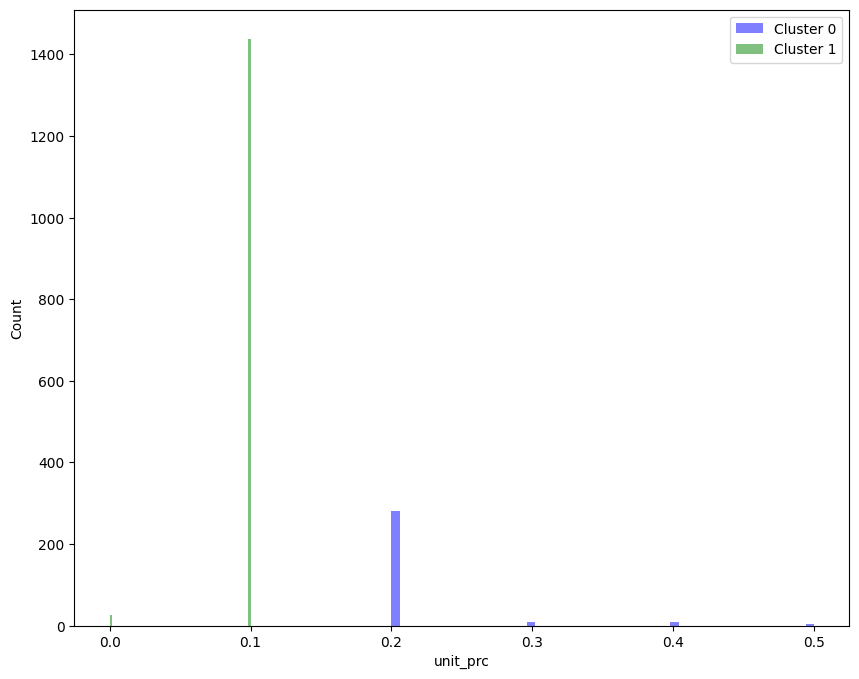

------------------------------


1    1463
0     301
Name: cluster, dtype: int64

In [ ]:
# 為每個分群指定不同的顏色
colors = ['b', 'g']

plt.figure(figsize=(10, 8))

# 繪製每個分群的直方圖
for i in range(2):
    df_cluster = df1_112[df1_112['cluster'] == i]
    plt.hist(df_cluster['unit_prc'], color=colors[i], alpha=0.5, bins=50, label=f'Cluster {i}')

plt.xlabel('unit_prc')
plt.ylabel('Count')
plt.legend()
plt.show()
print('------------------------------')
df1_112['cluster'].value_counts()

### 北投區售租比

In [ ]:
data_sell = df_112[['cluster','unit_prc']].groupby(by = 'cluster').mean()
data_sell.rename(columns={'unit_prc':'district_sell'}, inplace = True)
data_sell.reset_index(drop=False,inplace = True)
data_rent = df1_112[['cluster','unit_prc']].groupby(by = 'cluster').mean()
data_rent.rename(columns={'unit_prc':'district_rent'}, inplace = True)
data_rent.reset_index(drop=False,inplace = True)
data = pd.merge(data_rent,data_sell,left_on='cluster', right_on='cluster')
data['sell2rentratio'] = data['district_sell']/data['district_rent']
df_112 = df_112.merge(data[['cluster', 'district_rent', 'district_sell', 'sell2rentratio']], on=['cluster'], how='left')
df1_112 = df1_112.merge(data[['cluster', 'district_rent', 'district_sell', 'sell2rentratio']], on=['cluster'], how='left')
data

,cluster,district_rent,district_sell,sell2rentratio
0,0,0.211960,69.487366,327.832244
1,1,0.098291,39.319104,400.026771


## 內湖區 : 114

In [ ]:
# 選擇你想要分群的欄位
selected_columns = ['unit_prc']

df_selected = df_114[selected_columns]

# 正規化
scaler = MinMaxScaler()
df_normalized = scaler.fit_transform(df_selected)

# 進行標準化

scaler = StandardScaler()
df_selected_scaled = scaler.fit_transform(df_normalized)

# 使用KMeans進行分群，這裡假設我們要分成3群
kmeans = KMeans(n_clusters=2, random_state=10, n_init=10).fit(df_selected_scaled)

# 將分群結果存回原本的dataframe
df_114['cluster'] = kmeans.labels_

# 你現在可以檢視每一群的特性，例如計算每一群的平均值
df_114.groupby('cluster').mean()

<ipython-input-55-1443144e1986>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_114['cluster'] = kmeans.labels_


,district,tsign_fg,road_fg,coord_x,coord_y,land,build,berth,land_area,zoning_fg,...,unit_prc,berth_prc,year,month,day,unemployment,cpi,revenue,nearest_tradistance,nearest_metrodistance
cluster,,,,,,,,,,,,,,,,,,,,,
0,114.0,2.403552,0.360724,25.075502,121.590287,1.170961,1.028900,0.860028,9.700884,13.221448,...,75.440982,128.291783,2020.531685,6.568593,15.990599,3.832591,99.820118,876833.194638,0.026007,0.005857
1,114.0,2.608909,0.303708,25.073411,121.589487,1.346760,1.074595,0.745737,12.854017,12.235294,...,47.679007,42.197357,2020.358909,6.562660,16.141091,3.832332,99.538534,878788.794757,0.025955,0.008287


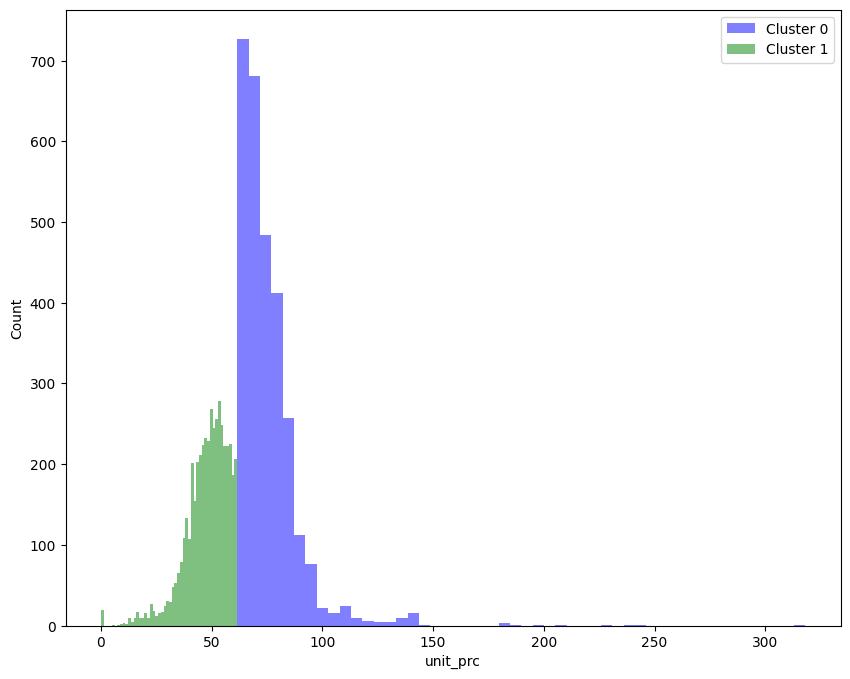

------------------------------


1    4692
0    2872
Name: cluster, dtype: int64

In [ ]:
# 為每個分群指定不同的顏色
colors = ['b', 'g']

plt.figure(figsize=(10, 8))

# 繪製每個分群的直方圖
for i in range(2):
    df_cluster = df_114[df_114['cluster'] == i]
    plt.hist(df_cluster['unit_prc'], color=colors[i], alpha=0.5, bins=50, label=f'Cluster {i}')

plt.xlabel('unit_prc')
plt.ylabel('Count')
plt.legend()
plt.show()
print('------------------------------')
df_114['cluster'].value_counts()

In [ ]:
# 選擇你想要分群的欄位
selected_columns = ['unit_prc']

df_selected = df1_114[selected_columns]

# 正規化
scaler = MinMaxScaler()
df_normalized = scaler.fit_transform(df_selected)

# 進行標準化

scaler = StandardScaler()
df_selected_scaled = scaler.fit_transform(df_normalized)

# 使用KMeans進行分群，這裡假設我們要分成3群
kmeans = KMeans(n_clusters=2, random_state=10, n_init=10).fit(df_selected_scaled)

# 將分群結果存回原本的dataframe
df1_114['cluster'] = kmeans.labels_

# 你現在可以檢視每一群的特性，例如計算每一群的平均值
df1_114.groupby('cluster').mean()

<ipython-input-57-b6c28700620f>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_114['cluster'] = kmeans.labels_


,district,tsign_fg,road_fg,coord_x,coord_y,land,build,berth,land_area,zoning_fg,...,unit_prc,berth_prc,year,month,day,unemployment,cpi,revenue,nearest_tradistance,nearest_metrodistance
cluster,,,,,,,,,,,,,,,,,,,,,
0,114.0,1.123874,0.668919,25.078891,121.581674,0.081081,0.882883,198.905405,3.328761,14.288288,...,0.214414,0.027027,2020.592342,6.373874,16.146396,3.809910,100.044279,875885.894144,0.030292,0.004286
1,114.0,1.152573,0.449664,25.075670,121.587047,0.105593,0.996421,0.583893,33.025727,12.690380,...,0.098971,0.019866,2020.382998,6.566890,16.224609,3.809485,99.719136,878930.703803,0.026537,0.006008


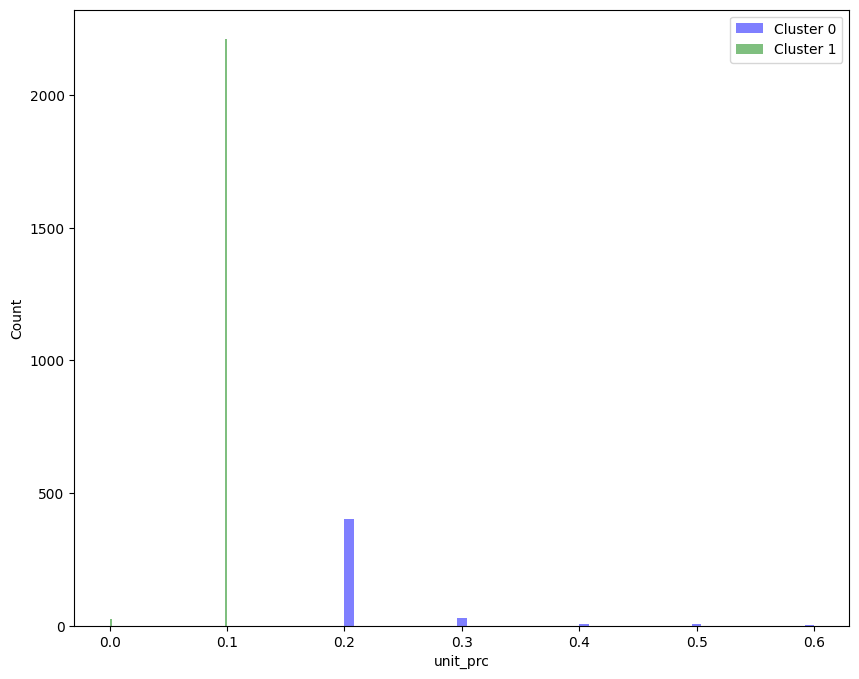

------------------------------


1    2235
0     444
Name: cluster, dtype: int64

In [ ]:
# 為每個分群指定不同的顏色
colors = ['b', 'g']

plt.figure(figsize=(10, 8))

# 繪製每個分群的直方圖
for i in range(2):
    df_cluster = df1_114[df1_114['cluster'] == i]
    plt.hist(df_cluster['unit_prc'], color=colors[i], alpha=0.5, bins=50, label=f'Cluster {i}')

plt.xlabel('unit_prc')
plt.ylabel('Count')
plt.legend()
plt.show()
print('------------------------------')
df1_114['cluster'].value_counts()

### 內湖區售租比

In [ ]:
data_sell = df_114[['cluster','unit_prc']].groupby(by = 'cluster').mean()
data_sell.rename(columns={'unit_prc':'district_sell'}, inplace = True)
data_sell.reset_index(drop=False,inplace = True)
data_rent = df1_114[['cluster','unit_prc']].groupby(by = 'cluster').mean()
data_rent.rename(columns={'unit_prc':'district_rent'}, inplace = True)
data_rent.reset_index(drop=False,inplace = True)
data = pd.merge(data_rent,data_sell,left_on='cluster', right_on='cluster')
data['sell2rentratio'] = data['district_sell']/data['district_rent']
df_114 = df_114.merge(data[['cluster', 'district_rent', 'district_sell', 'sell2rentratio']], on=['cluster'], how='left')
df1_114 = df1_114.merge(data[['cluster', 'district_rent', 'district_sell', 'sell2rentratio']], on=['cluster'], how='left')
data

,cluster,district_rent,district_sell,sell2rentratio
0,0,0.214414,75.440982,351.846596
1,1,0.098971,47.679007,481.747650


## 南港區 : 115

In [ ]:
# 選擇你想要分群的欄位
selected_columns = ['unit_prc']

df_selected = df_115[selected_columns]

# 正規化
scaler = MinMaxScaler()
df_normalized = scaler.fit_transform(df_selected)

# 進行標準化

scaler = StandardScaler()
df_selected_scaled = scaler.fit_transform(df_normalized)

# 使用KMeans進行分群，這裡假設我們要分成3群
kmeans = KMeans(n_clusters=2, random_state=10, n_init=10).fit(df_selected_scaled)

# 將分群結果存回原本的dataframe
df_115['cluster'] = kmeans.labels_

# 你現在可以檢視每一群的特性，例如計算每一群的平均值
df_115.groupby('cluster').mean()

<ipython-input-59-af8b7e66ecb7>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_115['cluster'] = kmeans.labels_


,district,tsign_fg,road_fg,coord_x,coord_y,land,build,berth,land_area,zoning_fg,...,unit_prc,berth_prc,year,month,day,unemployment,cpi,revenue,nearest_tradistance,nearest_metrodistance
cluster,,,,,,,,,,,,,,,,,,,,,
0,115.0,2.552611,0.445051,25.048710,121.600841,1.378020,1.047545,0.705378,11.186937,10.547935,...,48.315433,41.173032,2020.440374,6.668745,16.626656,3.840452,99.628200,725299.611847,0.011491,0.008407
1,115.0,2.394068,0.506356,25.052971,121.599137,1.235169,1.024364,0.792373,8.563994,6.497881,...,78.115360,113.649364,2020.871822,6.919492,15.612288,3.837606,100.438528,717800.258475,0.008895,0.005551


In [ ]:
df_115.loc[:, 'cluster'] = df_115['cluster'].replace({1: 0, 0: 1})

<ipython-input-117-3c87fa677388>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_115.loc[:, 'cluster'] = df_115['cluster'].replace({1: 0, 0: 1})


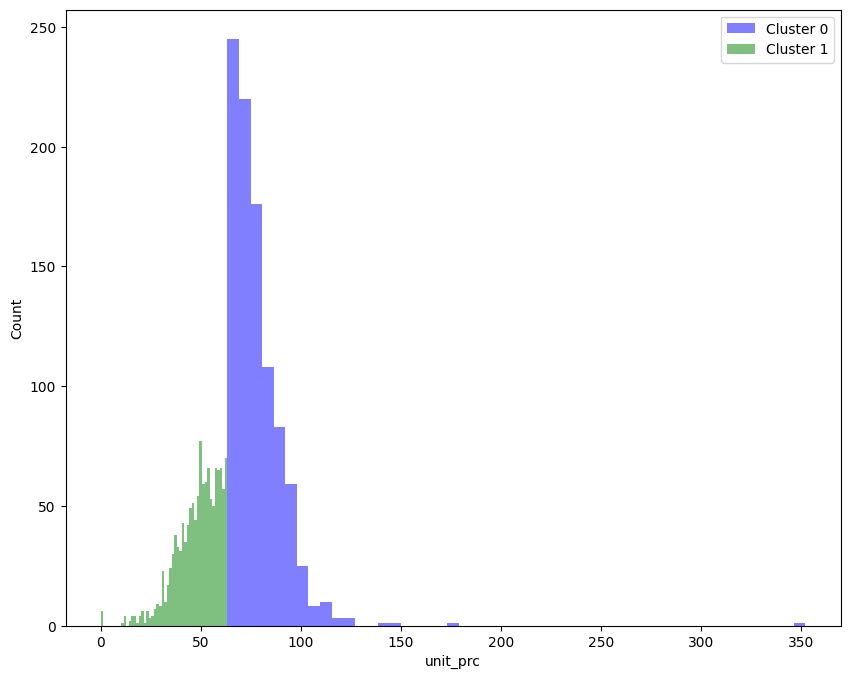

------------------------------


1    1283
0     944
Name: cluster, dtype: int64

In [ ]:
# 為每個分群指定不同的顏色
colors = ['b', 'g']

plt.figure(figsize=(10, 8))

# 繪製每個分群的直方圖
for i in range(2):
    df_cluster = df_115[df_115['cluster'] == i]
    plt.hist(df_cluster['unit_prc'], color=colors[i], alpha=0.5, bins=50, label=f'Cluster {i}')

plt.xlabel('unit_prc')
plt.ylabel('Count')
plt.legend()
plt.show()
print('------------------------------')
df_115['cluster'].value_counts()

In [ ]:
# 選擇你想要分群的欄位
selected_columns = ['unit_prc']

df_selected = df1_115[selected_columns]

# 正規化
scaler = MinMaxScaler()
df_normalized = scaler.fit_transform(df_selected)

# 進行標準化

scaler = StandardScaler()
df_selected_scaled = scaler.fit_transform(df_normalized)

# 使用KMeans進行分群，這裡假設我們要分成3群
kmeans = KMeans(n_clusters=2, random_state=10, n_init=10).fit(df_selected_scaled)

# 將分群結果存回原本的dataframe
df1_115['cluster'] = kmeans.labels_

# 你現在可以檢視每一群的特性，例如計算每一群的平均值
df1_115.groupby('cluster').mean()

<ipython-input-61-4c949ae4f25b>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_115['cluster'] = kmeans.labels_


,district,tsign_fg,road_fg,coord_x,coord_y,land,build,berth,land_area,zoning_fg,...,unit_prc,berth_prc,year,month,day,unemployment,cpi,revenue,nearest_tradistance,nearest_metrodistance
cluster,,,,,,,,,,,,,,,,,,,,,
0,115.0,1.158192,0.564972,25.052798,121.601715,0.107345,0.919492,0.471751,3.248927,6.148305,...,0.095904,0.004520,2020.741525,6.720339,16.240113,3.810876,100.365268,721641.915254,0.009395,0.005039
1,115.0,1.333333,0.746914,25.053546,121.605168,0.234568,0.938272,0.524691,2.538333,9.993827,...,0.210494,0.002469,2020.827160,7.358025,15.222222,3.815432,100.627407,718701.777778,0.008731,0.003346


In [ ]:
df1_115.loc[:, 'cluster'] = df1_115['cluster'].replace({1: 0, 0: 1})

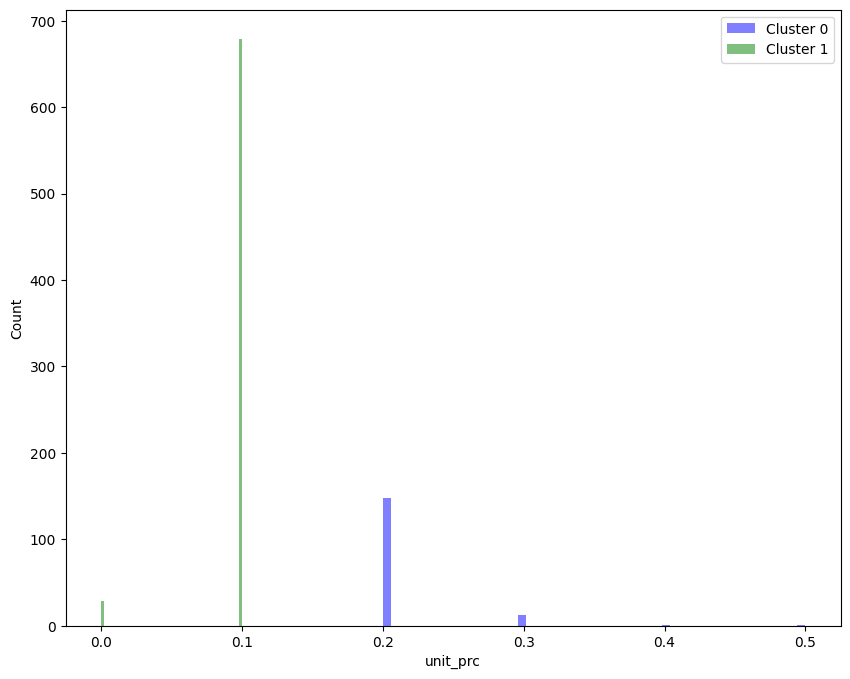

------------------------------


1    708
0    162
Name: cluster, dtype: int64

In [ ]:
# 為每個分群指定不同的顏色
colors = ['b', 'g']

plt.figure(figsize=(10, 8))

# 繪製每個分群的直方圖
for i in range(2):
    df_cluster = df1_115[df1_115['cluster'] == i]
    plt.hist(df_cluster['unit_prc'], color=colors[i], alpha=0.5, bins=50, label=f'Cluster {i}')

plt.xlabel('unit_prc')
plt.ylabel('Count')
plt.legend()
plt.show()
print('------------------------------')
df1_115['cluster'].value_counts()

### 南港區售租比

In [ ]:
data_sell = df_115[['cluster','unit_prc']].groupby(by = 'cluster').mean()
data_sell.rename(columns={'unit_prc':'district_sell'}, inplace = True)
data_sell.reset_index(drop=False,inplace = True)
data_rent = df1_115[['cluster','unit_prc']].groupby(by = 'cluster').mean()
data_rent.rename(columns={'unit_prc':'district_rent'}, inplace = True)
data_rent.reset_index(drop=False,inplace = True)
data = pd.merge(data_rent,data_sell,left_on='cluster', right_on='cluster')
data['sell2rentratio'] = data['district_sell']/data['district_rent']
df_115 = df_115.merge(data[['cluster', 'district_rent', 'district_sell', 'sell2rentratio']], on=['cluster'], how='left')
df1_115 = df1_115.merge(data[['cluster', 'district_rent', 'district_sell', 'sell2rentratio']], on=['cluster'], how='left')
data

,cluster,district_rent,district_sell,sell2rentratio
0,0,0.210494,78.115360,371.105230
1,1,0.095904,48.315433,503.789783


## 文山區 : 116

In [ ]:
# 選擇你想要分群的欄位
selected_columns = ['unit_prc']

df_selected = df_116[selected_columns]

# 正規化
scaler = MinMaxScaler()
df_normalized = scaler.fit_transform(df_selected)

# 進行標準化

scaler = StandardScaler()
df_selected_scaled = scaler.fit_transform(df_normalized)

# 使用KMeans進行分群，這裡假設我們要分成3群
kmeans = KMeans(n_clusters=2, random_state=10, n_init=10).fit(df_selected_scaled)

# 將分群結果存回原本的dataframe
df_116['cluster'] = kmeans.labels_

# 你現在可以檢視每一群的特性，例如計算每一群的平均值
df_116.groupby('cluster').mean()

<ipython-input-63-09b39412c554>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_116['cluster'] = kmeans.labels_


,district,tsign_fg,road_fg,coord_x,coord_y,land,build,berth,land_area,zoning_fg,...,unit_prc,berth_prc,year,month,day,unemployment,cpi,revenue,nearest_tradistance,nearest_metrodistance
cluster,,,,,,,,,,,,,,,,,,,,,
0,116.0,2.581314,0.349139,24.993954,121.558912,1.731647,1.025290,0.500527,11.743597,12.590797,...,40.488303,21.186863,2020.311556,6.51563,16.111345,3.834071,99.414714,840935.663505,0.058224,0.008017
1,116.0,2.491348,0.490437,24.989823,121.540315,1.674408,1.020492,0.617942,10.240369,11.956740,...,61.766940,85.049180,2020.664845,6.56694,15.945355,3.837887,100.003037,847543.566940,0.068261,0.020876


In [ ]:
df_116.loc[:, 'cluster'] = df_116['cluster'].replace({1: 0, 0: 1})

<ipython-input-122-557a7ad78a63>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_116.loc[:, 'cluster'] = df_116['cluster'].replace({1: 0, 0: 1})


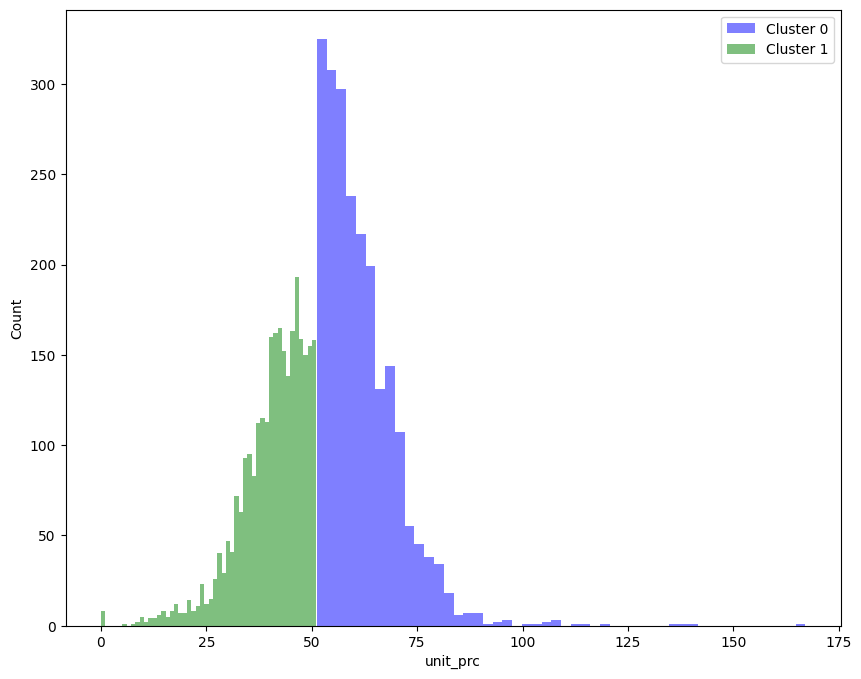

------------------------------


1    2847
0    2196
Name: cluster, dtype: int64

In [ ]:
# 為每個分群指定不同的顏色
colors = ['b', 'g']

plt.figure(figsize=(10, 8))

# 繪製每個分群的直方圖
for i in range(2):
    df_cluster = df_116[df_116['cluster'] == i]
    plt.hist(df_cluster['unit_prc'], color=colors[i], alpha=0.5, bins=50, label=f'Cluster {i}')

plt.xlabel('unit_prc')
plt.ylabel('Count')
plt.legend()
plt.show()
print('------------------------------')
df_116['cluster'].value_counts()

In [ ]:
# 選擇你想要分群的欄位
selected_columns = ['unit_prc']

df_selected = df1_116[selected_columns]

# 正規化
scaler = MinMaxScaler()
df_normalized = scaler.fit_transform(df_selected)

# 進行標準化

scaler = StandardScaler()
df_selected_scaled = scaler.fit_transform(df_normalized)

# 使用KMeans進行分群，這裡假設我們要分成3群
kmeans = KMeans(n_clusters=2, random_state=10, n_init=10).fit(df_selected_scaled)

# 將分群結果存回原本的dataframe
df1_116['cluster'] = kmeans.labels_

# 你現在可以檢視每一群的特性，例如計算每一群的平均值
df1_116.groupby('cluster').mean()

<ipython-input-65-a0fbdec70167>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_116['cluster'] = kmeans.labels_


,district,tsign_fg,road_fg,coord_x,coord_y,land,build,berth,land_area,zoning_fg,...,unit_prc,berth_prc,year,month,day,unemployment,cpi,revenue,nearest_tradistance,nearest_metrodistance
cluster,,,,,,,,,,,,,,,,,,,,,
0,116.0,1.067520,0.491269,24.995434,121.553543,0.048894,0.928987,0.227008,1.433388,8.904540,...,0.103376,0.001979,2020.837020,6.844005,16.419092,3.809313,100.536065,852893.991851,0.057006,0.006433
1,116.0,1.090909,1.000000,24.998325,121.547637,0.090909,0.818182,0.000000,4.537273,28.363636,...,0.463636,0.000000,2020.909091,5.636364,10.272727,3.836364,100.202727,853725.363636,0.054252,0.002063


In [ ]:
df1_116.loc[:, 'cluster'] = df1_116['cluster'].replace({1: 0, 0: 1})

<ipython-input-124-452c284d4423>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_116.loc[:, 'cluster'] = df1_116['cluster'].replace({1: 0, 0: 1})


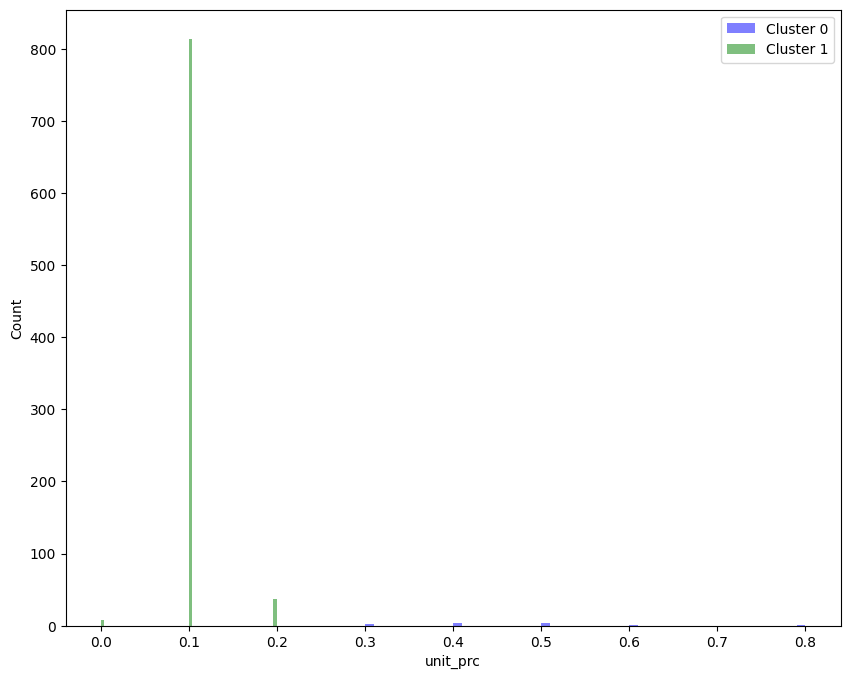

------------------------------


1    859
0     11
Name: cluster, dtype: int64

In [ ]:
# 為每個分群指定不同的顏色
colors = ['b', 'g']

plt.figure(figsize=(10, 8))

# 繪製每個分群的直方圖
for i in range(2):
    df_cluster = df1_116[df1_116['cluster'] == i]
    plt.hist(df_cluster['unit_prc'], color=colors[i], alpha=0.5, bins=50, label=f'Cluster {i}')

plt.xlabel('unit_prc')
plt.ylabel('Count')
plt.legend()
plt.show()
print('------------------------------')
df1_116['cluster'].value_counts()

### 文山區售租比

In [ ]:
data_sell = df_116[['cluster','unit_prc']].groupby(by = 'cluster').mean()
data_sell.rename(columns={'unit_prc':'district_sell'}, inplace = True)
data_sell.reset_index(drop=False,inplace = True)
data_rent = df1_116[['cluster','unit_prc']].groupby(by = 'cluster').mean()
data_rent.rename(columns={'unit_prc':'district_rent'}, inplace = True)
data_rent.reset_index(drop=False,inplace = True)
data = pd.merge(data_rent,data_sell,left_on='cluster', right_on='cluster')
data['sell2rentratio'] = data['district_sell']/data['district_rent']
df_116 = df_116.merge(data[['cluster', 'district_rent', 'district_sell', 'sell2rentratio']], on=['cluster'], how='left')
df1_116 = df1_116.merge(data[['cluster', 'district_rent', 'district_sell', 'sell2rentratio']], on=['cluster'], how='left')
data

,cluster,district_rent,district_sell,sell2rentratio
0,0,0.463636,61.766940,133.222812
1,1,0.103376,40.488303,391.660503


# 合併 DataFrame

In [ ]:
df = pd.concat([df_100, df_103, df_104, df_105, df_106, df_108, df_110, df_111, df_112, df_114, df_115, df_116], axis=0)
df = df.reset_index(drop=True)

In [ ]:
df

,district,tsign_fg,road_fg,coord_x,coord_y,land,build,berth,land_area,zoning_fg,...,day,unemployment,cpi,revenue,nearest_tradistance,nearest_metrodistance,cluster,district_rent,district_sell,sell2rentratio
0,100,3,1,25.046222,121.515830,1,1,0,58.40,2.0,...,14,4.0,99.58,936721.0,0.002501,0.001587,0,0.218269,104.349431,478.076688
1,100,2,1,25.033744,121.510901,3,1,7,73.33,1.0,...,3,3.7,101.61,945214.0,0.011064,0.001841,0,0.218269,104.349431,478.076688
2,100,3,1,25.028788,121.521543,4,6,0,38.52,2.0,...,21,3.9,97.94,988329.0,0.019281,0.002755,0,0.218269,104.349431,478.076688
3,100,2,1,25.046793,121.513383,1,3,19,113.91,2.0,...,16,3.9,98.44,988329.0,0.004550,0.004061,1,0.099618,64.191895,644.378407
4,100,2,1,25.041592,121.532457,4,1,3,45.46,2.0,...,11,4.0,100.55,936721.0,0.015846,0.001178,0,0.218269,104.349431,478.076688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55404,116,3,1,24.991914,121.542926,1,1,0,0.36,2.0,...,19,3.7,103.78,884700.0,0.059868,0.002408,1,0.103376,40.488303,391.660503
55405,116,3,1,24.992137,121.543017,1,1,0,0.41,2.0,...,22,4.0,98.69,830247.0,0.059779,0.002420,1,0.103376,40.488303,391.660503
55406,116,3,1,24.991914,121.542926,1,1,0,0.15,2.0,...,3,4.0,101.24,830247.0,0.059868,0.002408,1,0.103376,40.488303,391.660503
55407,116,2,1,24.989309,121.568964,1,2,2,0.04,2.0,...,25,3.9,97.94,849521.0,0.060737,0.009302,1,0.103376,40.488303,391.660503


In [ ]:
df1 = pd.concat([df1_100, df1_103, df1_104, df1_105, df1_106, df1_108, df1_110, df1_111, df1_112, df1_114, df1_115, df1_116], axis=0)
df1 = df1.reset_index(drop=True) # 重置索引

In [ ]:
df.to_csv('coidA_APPRRENT_preprocessfinal.csv', index=False, encoding='utf-8-sig')